<div class="alert alert-info" role="alert">
<font color=k> 

# Data Set Information:

### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### There are four datasets:
* 1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
* 2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
* 3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
* 4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
* The smallest datasets` are provided to test more computationally demanding machine learning algorithms (e.g., SVM).
* 
* The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


## Attribute Information:

## Input variables:
###  Bank client data:

* 1 - age (numeric)
* 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - Balance: The total balance of a person on a yearly basis is given.
* 7 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 8 - loan: has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:

* 9 - contact: contact communication type (categorical: 'cellular','telephone')
* 10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 11 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* 12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:

* 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* 16 - p-outcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
* Output variable (desired target):
* 17 - y - has the client subscribed a term deposit? (binary: 'yes','no')
</font>  
</div>

<h1 style="text-align:center;background-color:Green; color:white" >Importing Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from IPython.core.display import HTML, display

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv('bank-full.csv',sep=';')
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

<h2><span class="label label-default">DATA DIMENSION</span></h2>

In [5]:
print('In this dataset, No.of.rows are :',df.shape[0])
print('In this dataset, No.of.columns are :',df.shape[1])

In this dataset, No.of.rows are : 45211
In this dataset, No.of.columns are : 17


<h2><span class="label label-default">INFO FOR ALL FEATURES</span></h2>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [164]:
a = df.select_dtypes(include='O').columns
b = df.select_dtypes(exclude='O').columns
print(f'There around {len(a)} categorical columns')
print(f'There around {len(b)} Numerical columns')

There around 10 categorical columns
There around 7 Numerical columns


<h2><span class="label label-default">STATISTICAL SUMMARY</span></h2>

In [7]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

* The age ranges from 18-95 yrs , the 50% of account holders are between 33-48 yrs
* The min balance is -8019.0 and the maximum balance is 102127 , the average balance across all account is 1000
* The calls have been contacted every day in a month
* The min duration 0, it says some people are not attending the calls, the average duration is 400s the max is 4918s
* In current campaign the min 1 call to max of 63 calls have been done
* Most of customers are not contacted in previous campaign

<h2><span class="label label-default">MISSING VALUE ANALYSIS</span></h2>

In [8]:
df.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<div class="alert alert-success" role="alert">
We dont have any missing values in the dataset
</div>

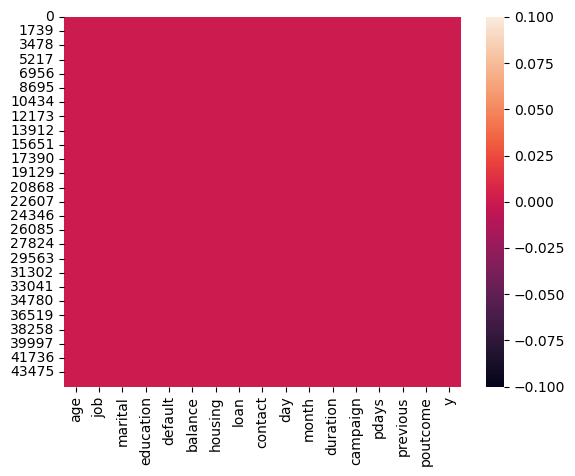

In [9]:
## Visualization for Null value
sns.heatmap(df.isnull())
plt.show()

<h2> <span class="label label-warning"; style="color:black">Target column</span></h2>

In [10]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

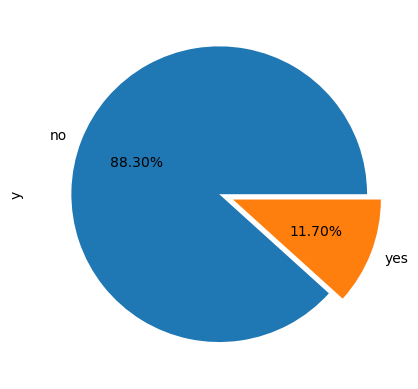

In [11]:
df.y.value_counts().plot(kind='pie',autopct = '%0.2f%%',radius=1,explode=(0,0.1))
plt.show()

* The target variable values has more "NO" for the term deposits and the percentage for "NO" is 88.30 % and "YES" has less percentage for term deposits is 11.70%
* We have around 88 % account holder not subscribed for term deposit around 12% account subscribed for term deposit

In [12]:
cat = df.select_dtypes(include='object').columns
num = df.select_dtypes(exclude='object').columns

In [165]:
cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [166]:
num

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

<h2><span class="label label-default">Checking for Duplicates</span></h2>

In [13]:
df.duplicated().sum()

0

<div class="alert alert-success" role="alert">
There is no duplicates in the data
</div>

<h2><span class="label label-default">CHECKING FOR SKEWNESS</span></h2>

In [14]:
df.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

The balance,duration,campaign,pdays,previous columns are highly skewed

<h2><span class="label label-default">Univariate analysis</span></h2>

<a class="btn btn-primary btn-lg btn-block active"  style="color:white;">Numerical</a>

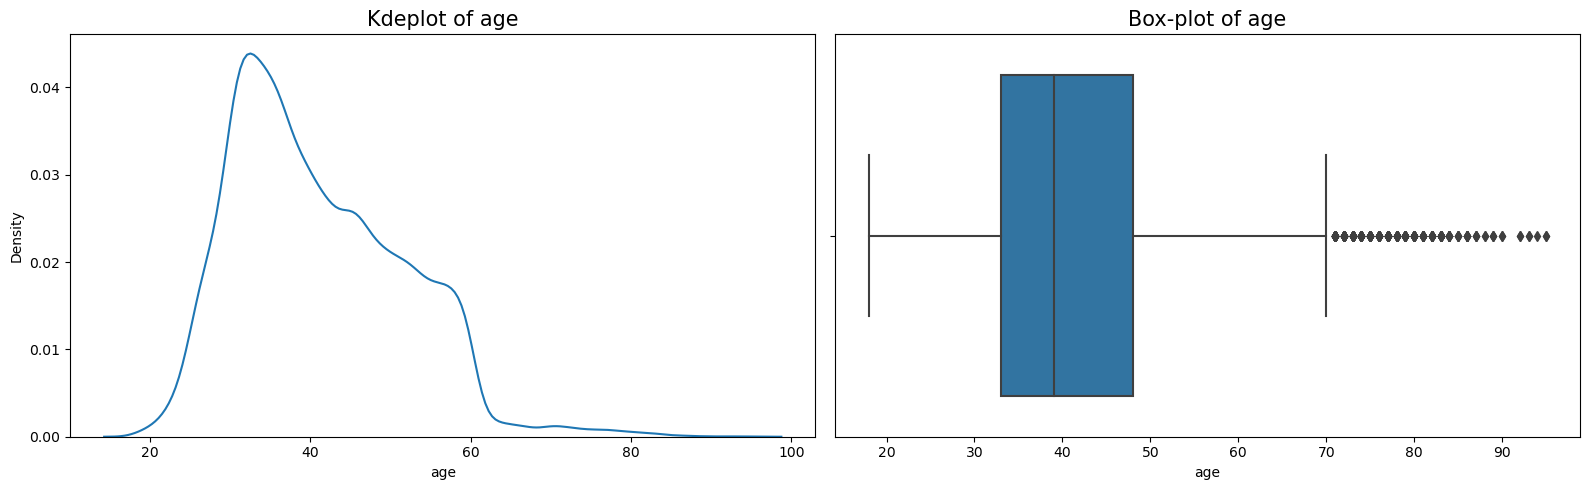

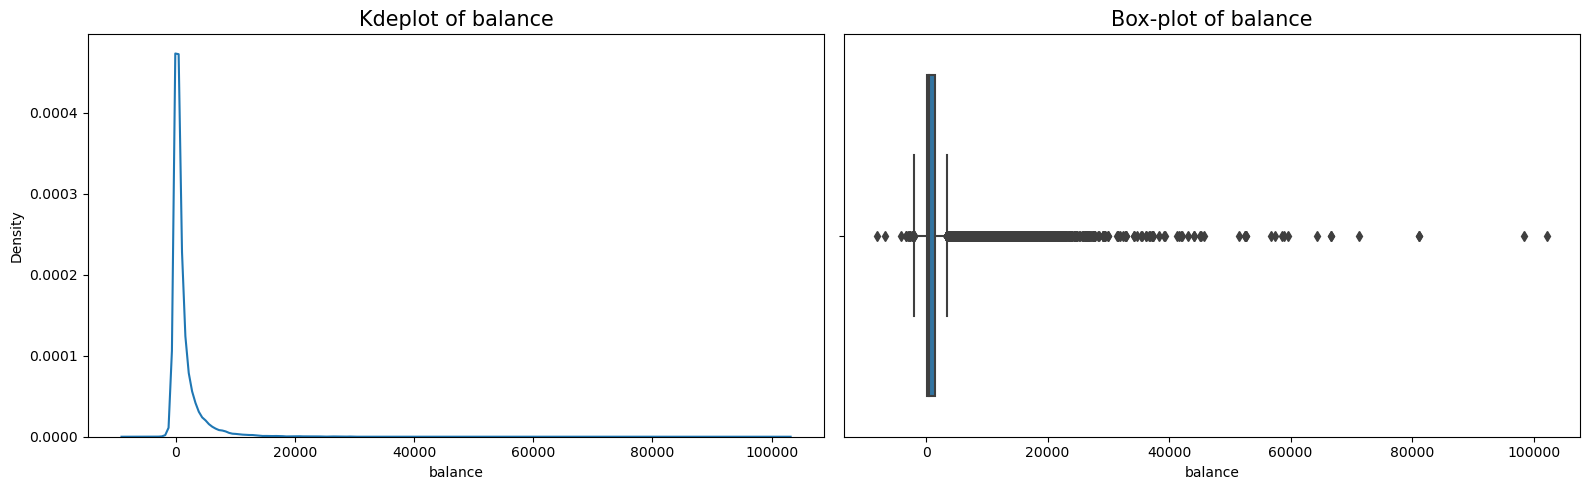

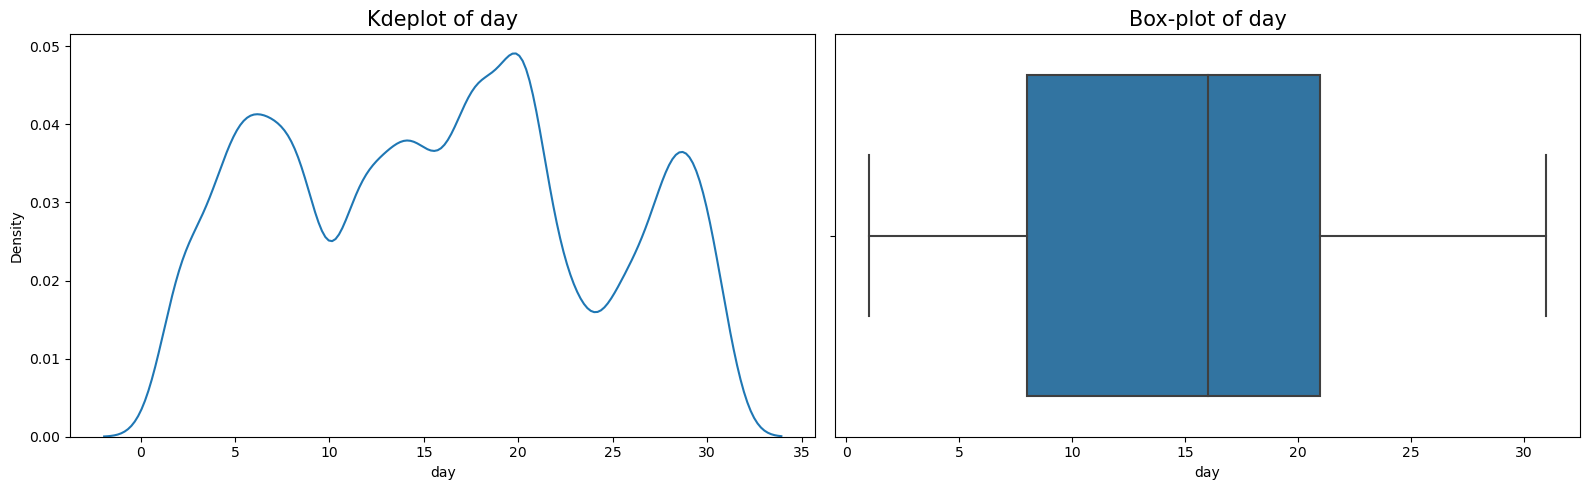

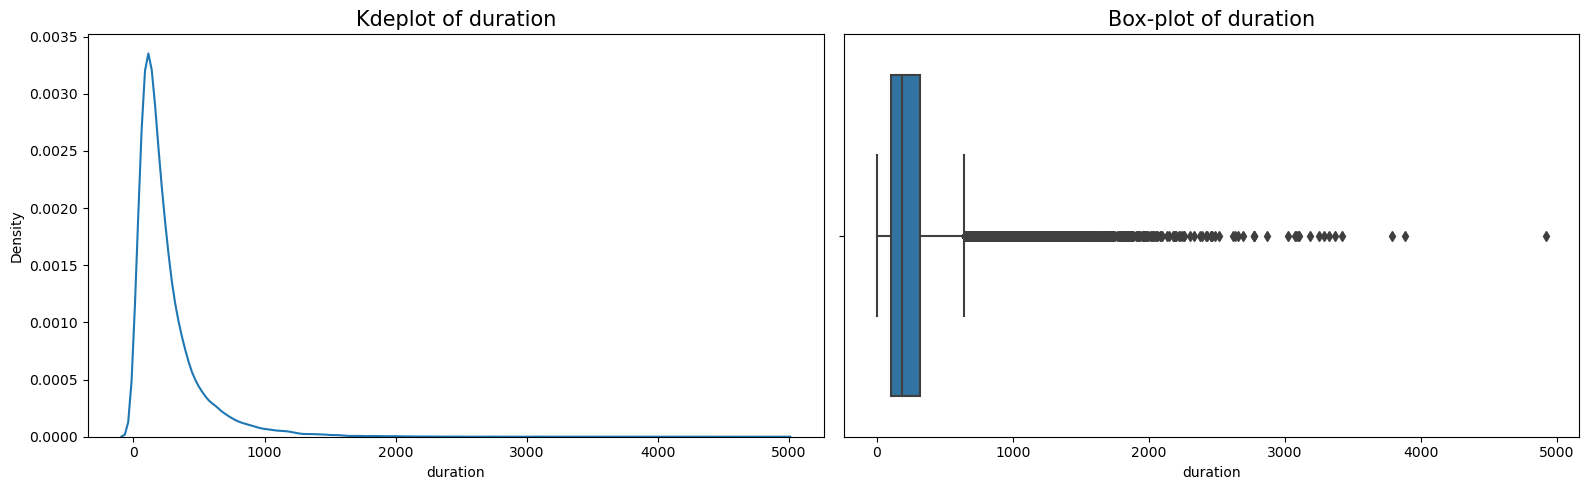

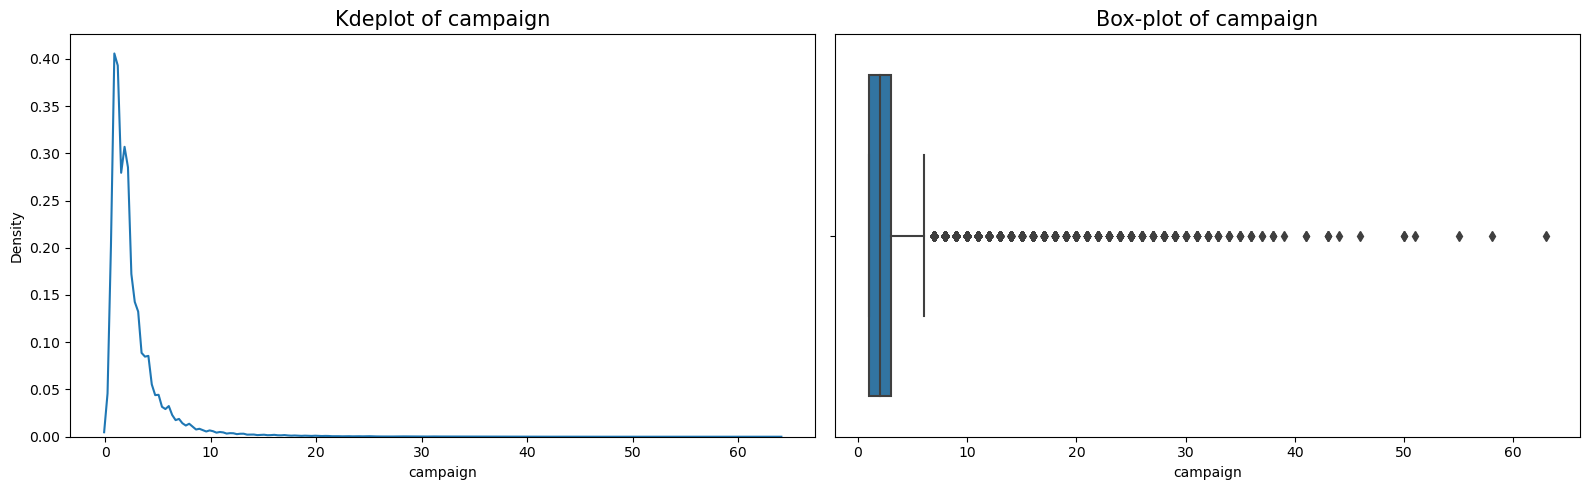

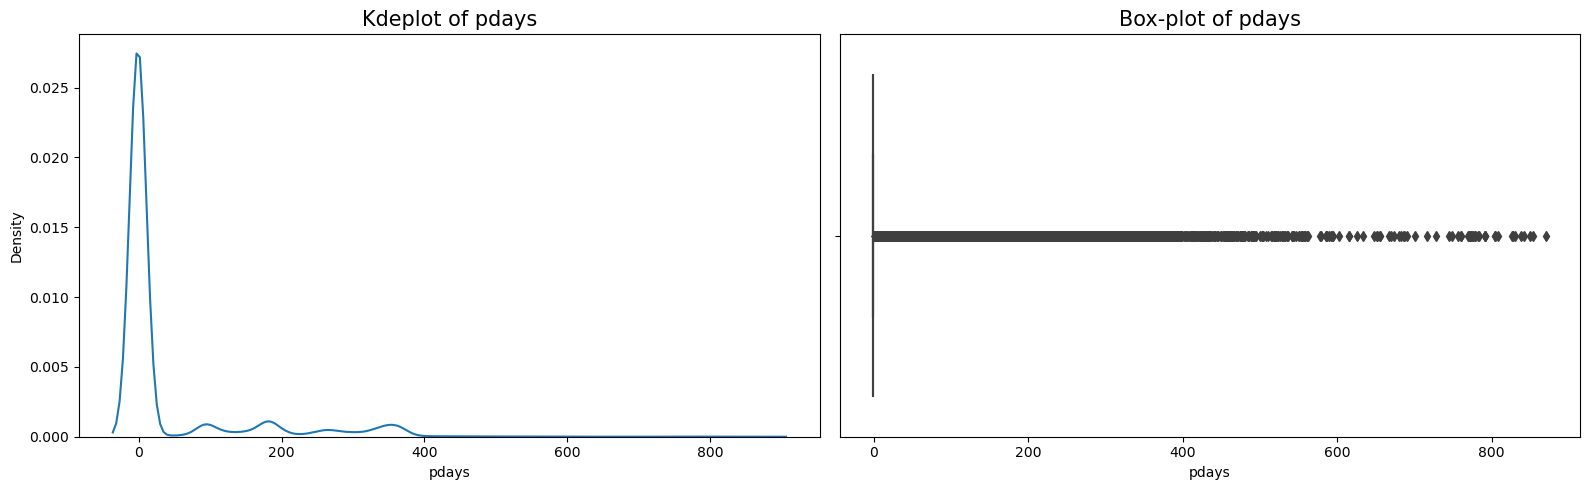

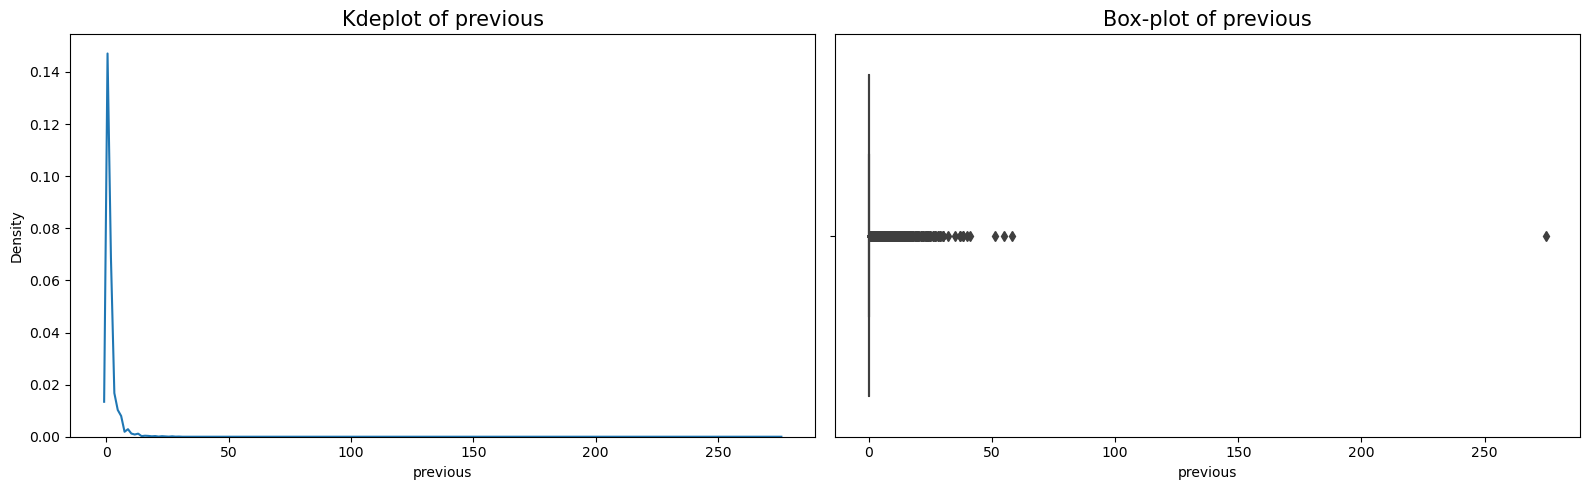

In [15]:
numerical_cols = list(num)
for i,col in enumerate(numerical_cols):
    text=""+ f"Distribution of  {col}"+ ""
    display(HTML(text))
    plt.figure(figsize=(16,5))
    
    plt.subplot(1,2,1)
    sns.kdeplot(data=df,x=col)
    plt.title(f'Kdeplot of {col}',size=15)
    
    plt.subplot(1,2,2)
    sns.boxplot(data=df,x=col)
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

* From the above plot we can identify that the "Balance, Day, Duration, Campaign, Pdays, Previous" is positive and right skewed.
* From the above plot we can say that there are outliers present in the data
* The balance, duration have the high outliers
* Age – 75 % of the people are the age between 20 to 50
* Balance – Average balance in most of the people rs.3000 only
* Day – All the days in the month are equally distributed
* Duration – Average call duration between 400 seconds
* Campaign – Average of 3 calls contacted per person
* Pdays – Most of the people are not contacted
* Previous – Most of the people are not contacted

<a class="btn btn-primary btn-lg btn-block active"  style="color:white;">Categorical</a>

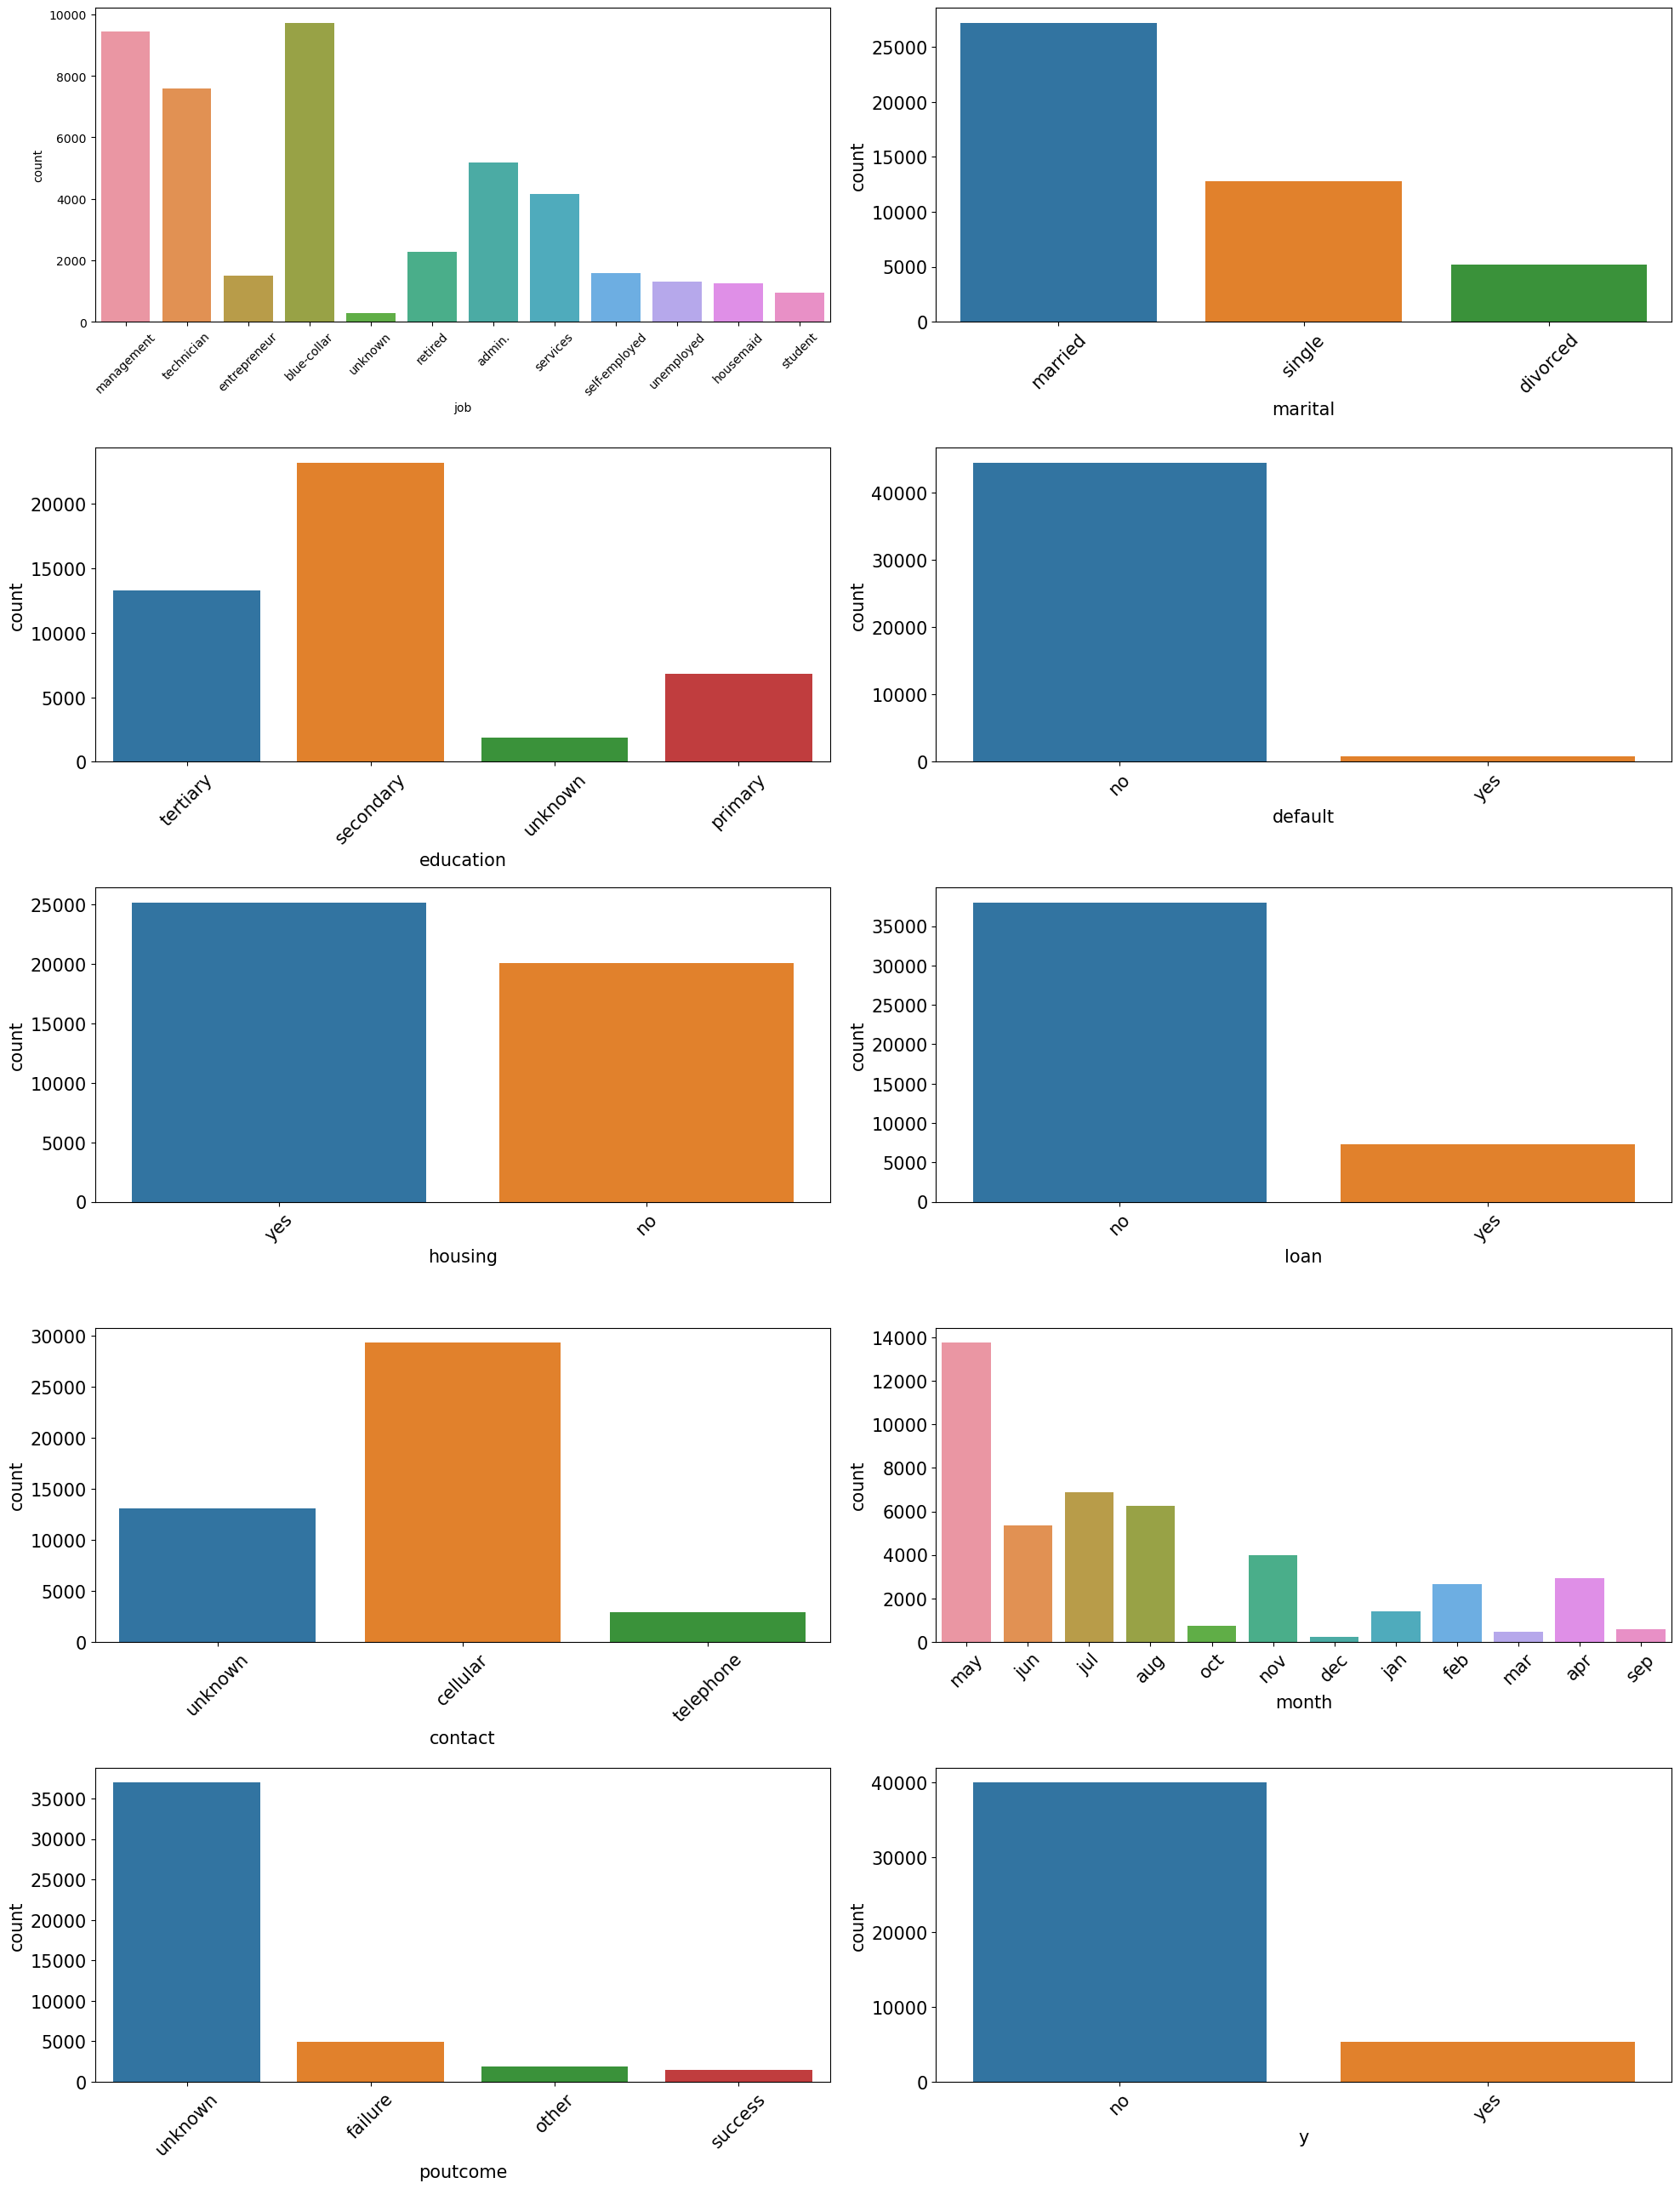

In [168]:
plt.figure(figsize=(20,30))

nrows = 6
ncols = 2 
iterator = 1
for i in cat:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(data=df,x=i)
    iterator=iterator+1
    plt.xticks(rotation =45)
    plt.rcParams.update({'font.size':15 })
plt.tight_layout()
plt.show()

* 1. Job - Blue collar and management has high number of working when compared to other jobs
* 2. Marital - Married are high than single and divorced
* 3. Education - Most people are secondary educated
* 4. default - most of the people do not has credit default
* 5. Housing - People partially have less housing loans
* 6. Loan -Most of people do not have loans
* 7. Contact - Bank has contacted on cellular than other modes
* 8. Month - May month has high contacted no of peoples
* 9. Poutcome - Previous outcome most of the results are unknown
* 10. y - most of the people said no for term deposits

<h2><span class="label label-default">Bivariate Analysis</span></h2>

<a class="btn btn-primary btn-lg btn-block active"  style="color:white;">Numerical w.r.t Target</a>

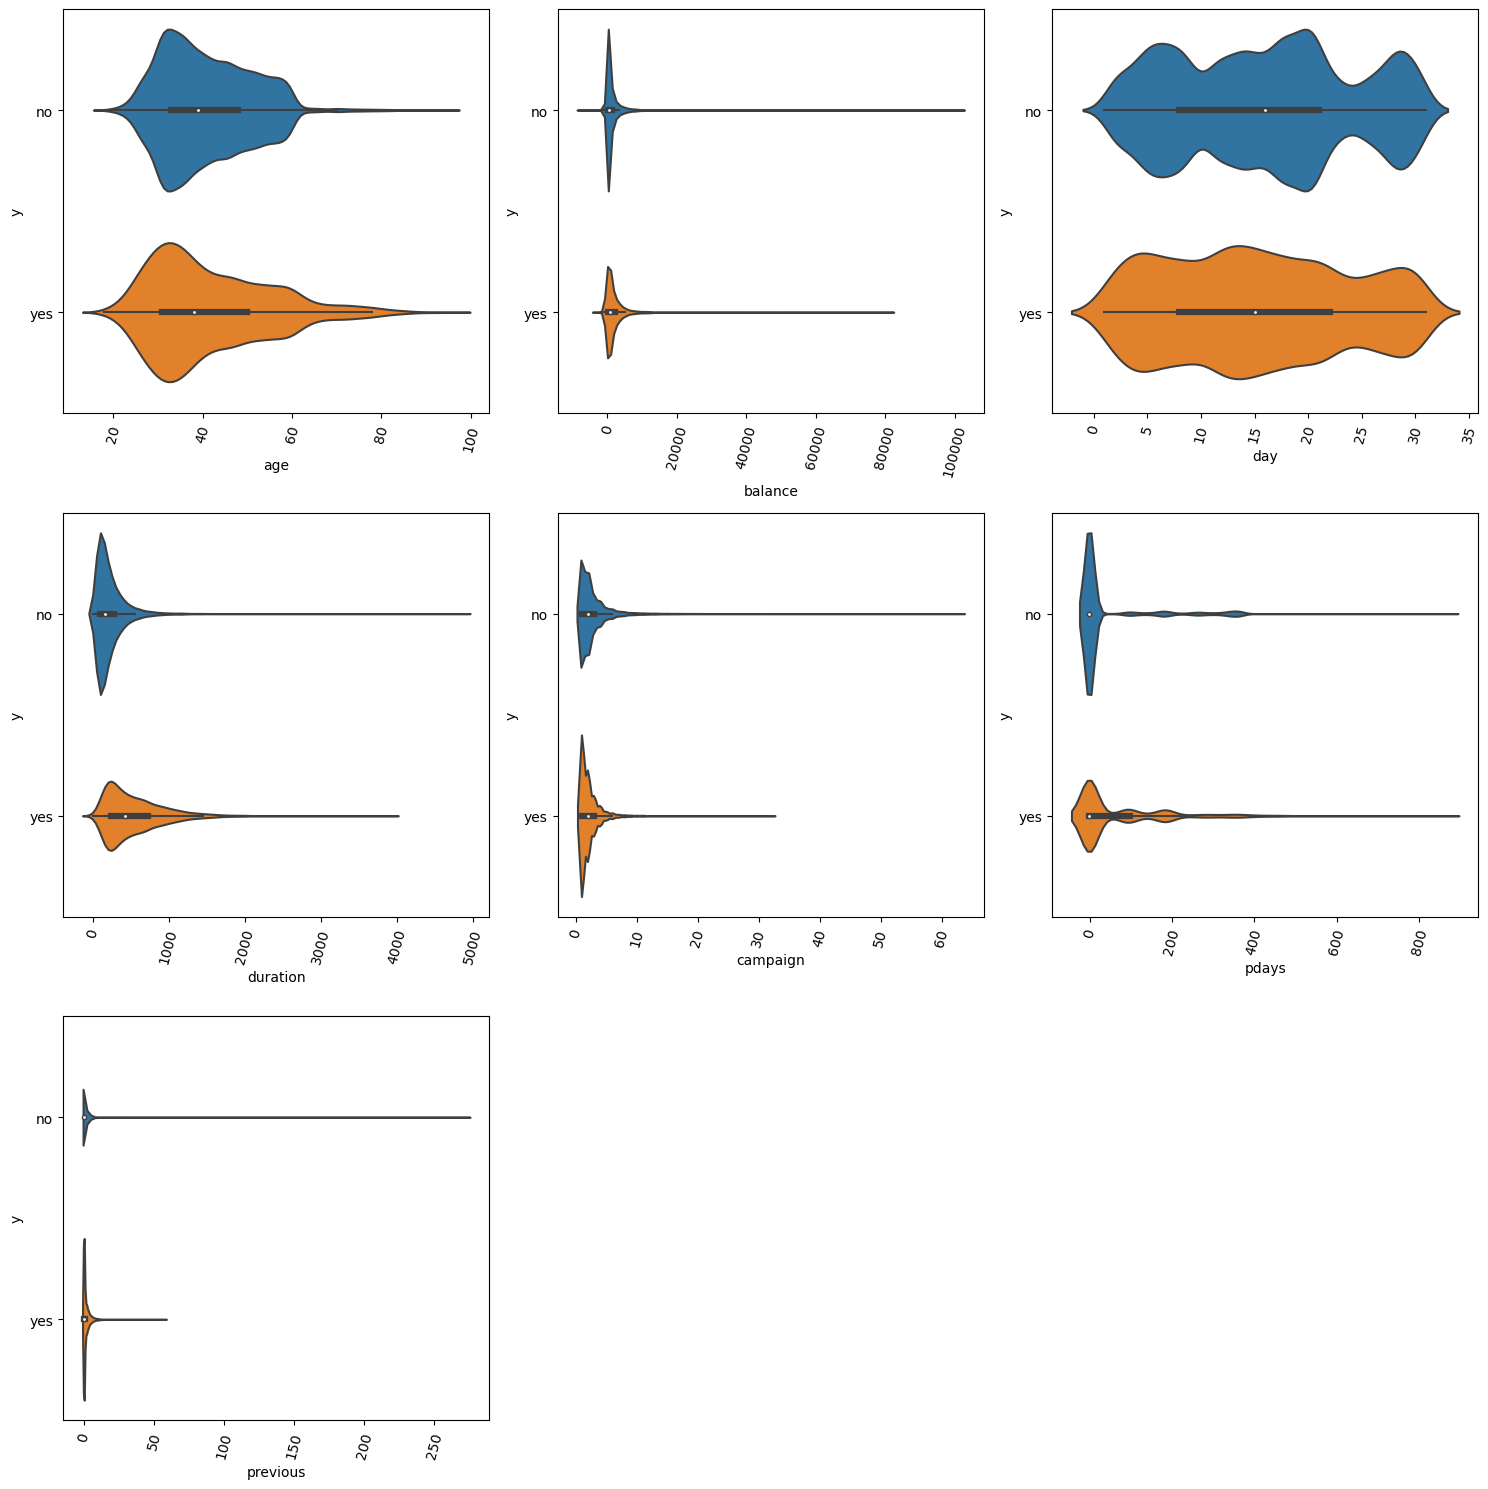

In [17]:
plt.figure(figsize=(15,15))
irows =3
icol  =3
iterator = 1
for i in num:
    plt.subplot(irows,icol,iterator)
    sns.violinplot(data=df,x=i,y='y')
    iterator=iterator+1
    plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

* The average age between 25 to 40 have more no of customers with both ‘yes’ and ‘no’ responses.
* The average bank balance of customers between 0 to 3000 have recorded both ‘yes’ and ‘no’ responses.
* The day between 1 to 32 are equally distributed for both ‘yes’ and ‘no’ responses.
* The average duration of calls of customers between 0 to 1000 have said ‘yes’ to the subscription and average duration of calls of customers between 0 to 600 have said ‘no’ for the subscription.
* The average marketing campaign (telephonic marketing) for a person is around 3 calls.


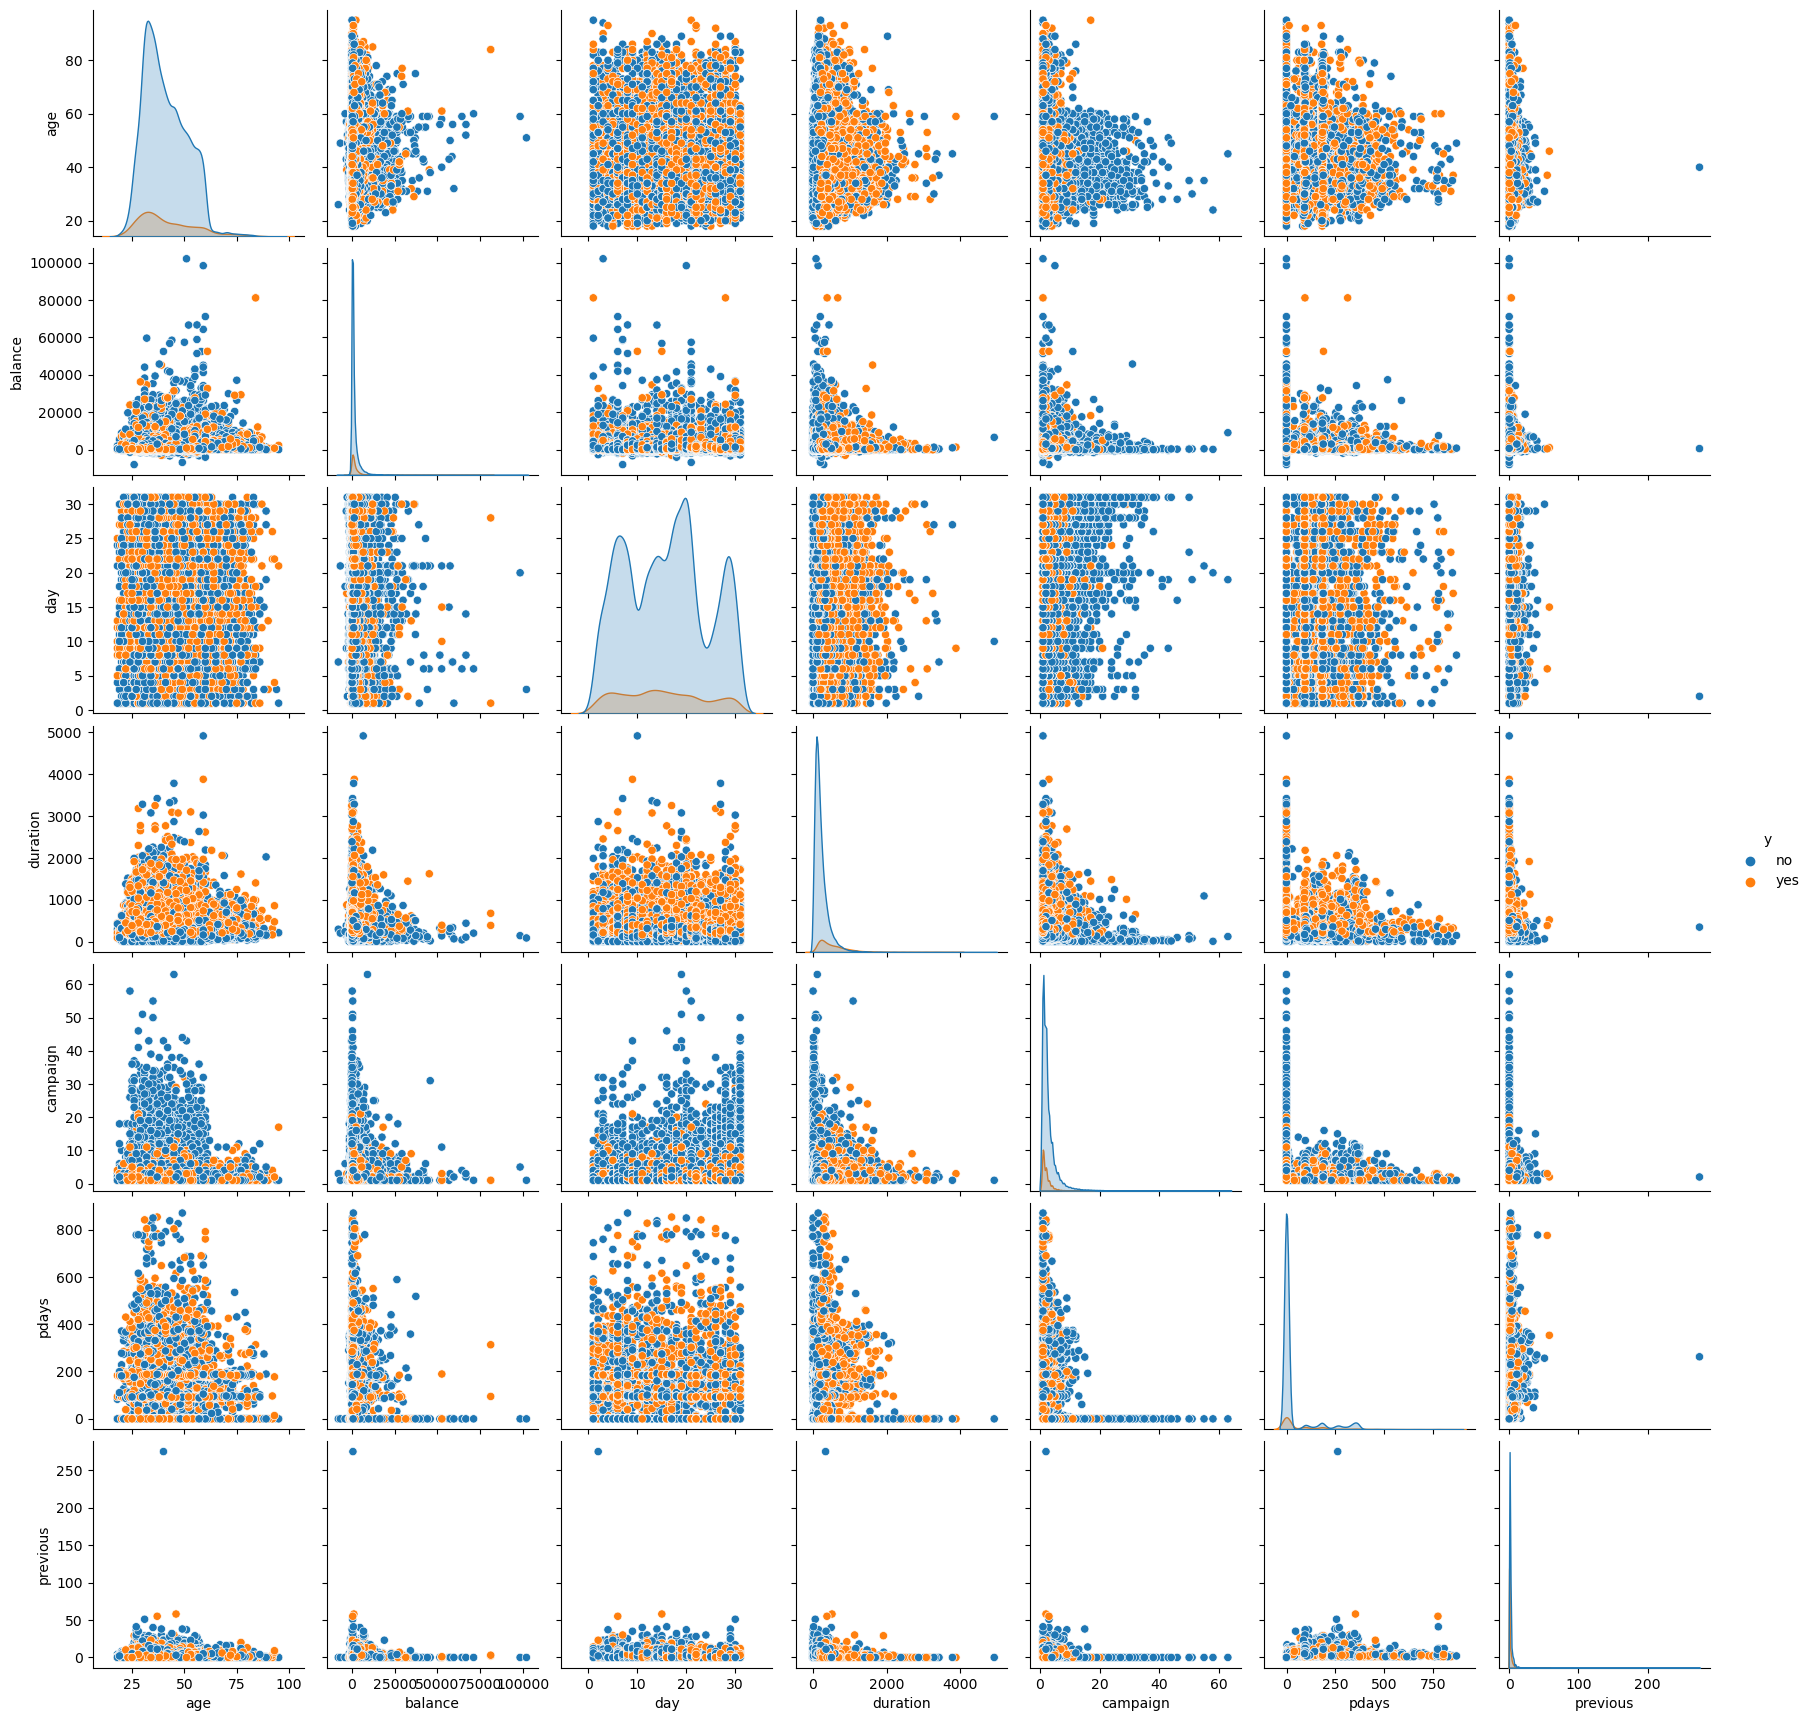

In [18]:
sns.pairplot(df,hue='y')
plt.show()

<a class="btn btn-primary btn-lg btn-block active"  style="color:white;">Categorical w.r.t Target</a>

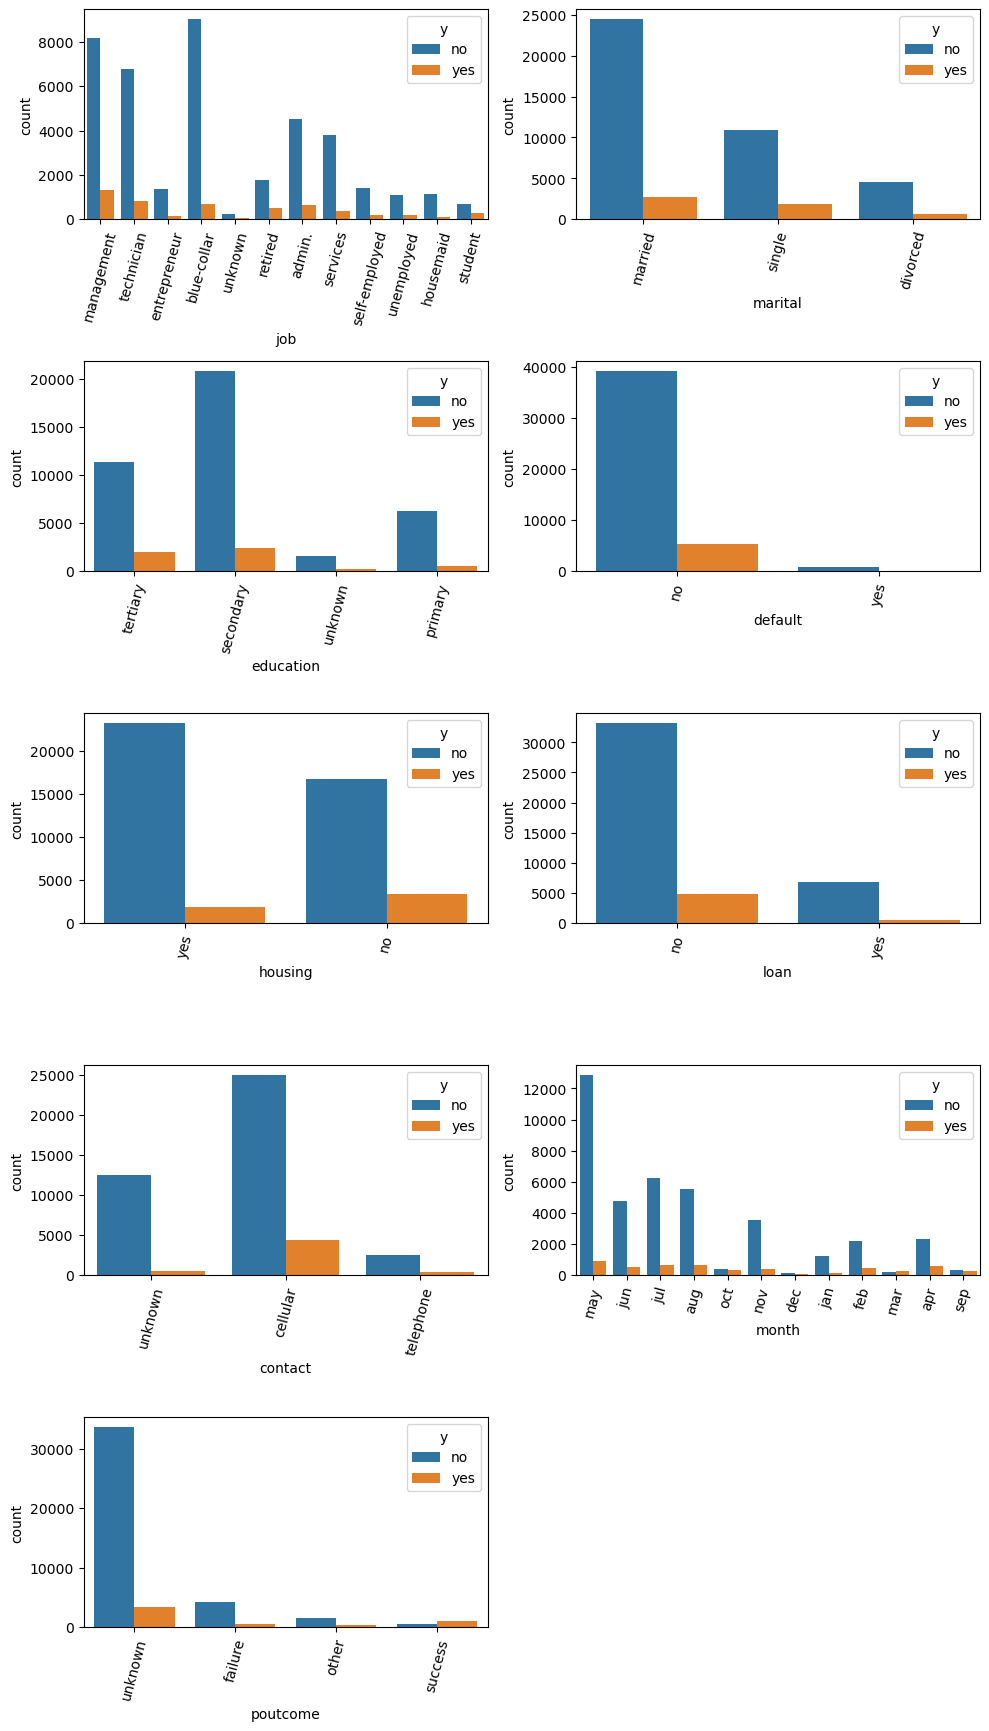

In [19]:
plt.figure(figsize=(10,20))
irows =6
icol  =2
iterator = 1
for i in cat[:-1]:
    plt.subplot(irows,icol,iterator)
    sns.countplot(data=df,x=i,hue='y')
    iterator=iterator+1
    plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

* In job category, management, technology, blue-collar have highly subscribed to term deposits.
* In marital category both married and single have subscribed more in numbers.
* In the education category both secondary and tertiary sub-categories have subscribed more in numbers than to those working in management & blue-collar categories. 
* In default category most of the customers have not subscribed.
* In housing category most of the customers with no housing loan have subscribed more in numbers. 
* In loan category the customers with no loan have subscribed more.
* In contact category the customers with cellular phone have subscribed more.



In [20]:
df1 = df.copy(deep=True)

In [21]:
d={'no':0,'yes':1}
df1['y'] = df1['y'].replace(d)

In [22]:
a = np.where(np.abs(df1.select_dtypes(exclude='object').corr())>0.5,'True',round((df1.select_dtypes(exclude='object').corr()),4))

<a  class="btn btn-info btn-lg active" style="color:Black;">Correlation</a>

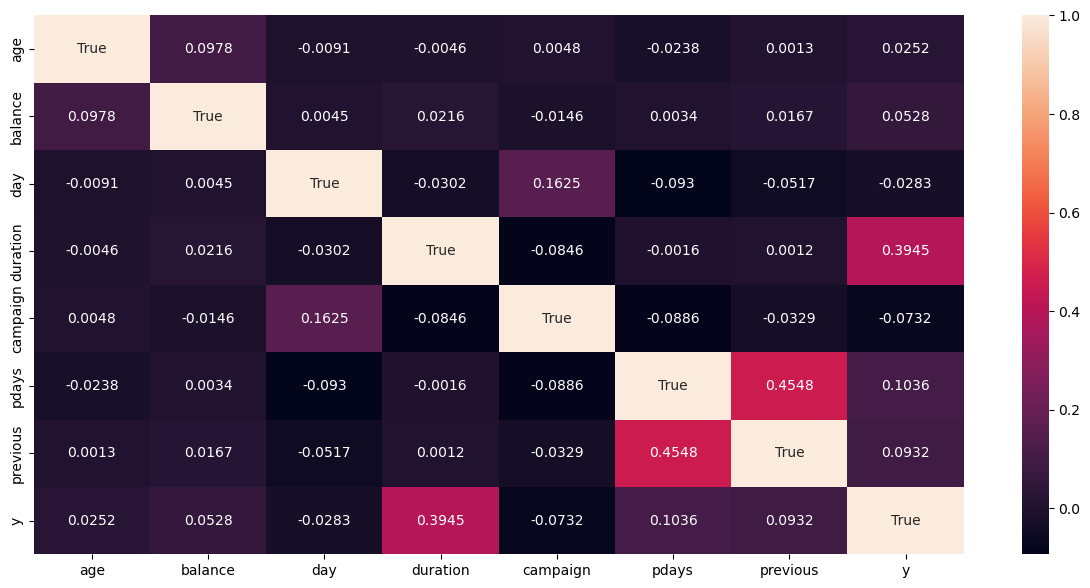

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.select_dtypes(exclude='object').corr(),annot=a,fmt='')
plt.show()

* No feature is highly correlated to each other
* So all the features are equally important to predict the target 
* From the above we can say that pdays,previous,duration has some correlation

<h3 style="border:2px solid DodgerBlue;">Month w.r.t to Target</h3>

In [24]:
y1 = df[df['y']=='no']
y = df[df['y']=='yes']

In [25]:
# a=['r','green','orange','blue','black','purple','maroon','brown','g','violet','pink','gray','olive','cyan']

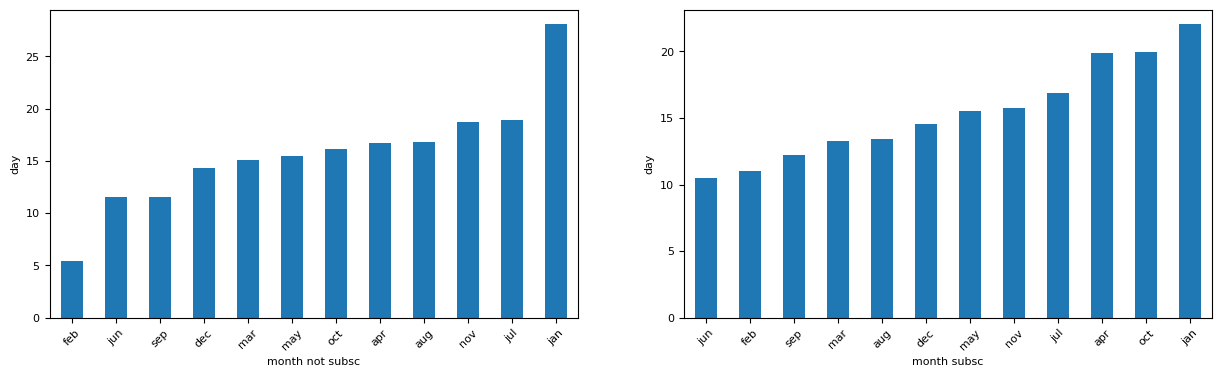

In [108]:
fig,axes = plt.subplots(1,2,figsize=(15,4))
y1.groupby('month')['day'].mean().sort_values(ascending=True).plot(kind='bar',ax=axes[0],xlabel='month not subsc',ylabel = 'day')
y.groupby('month')['day'].mean().sort_values(ascending=True).plot(kind='bar',ax=axes[1])
plt.xlabel('month subsc')
for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45)
plt.ylabel('day')
plt.show()

* Jan month From the above figure January has most number of count for Yes and No
* February has less counts for No and june has less counts for yes
* May month has the most calls done and has average no of yes for subscriber
* Because of the year starting most number of subscribing to term depsoits

<h3 style="border:2px solid DodgerBlue;">Duration w.r.t to Target</h3>

In [27]:
df.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

* Statistical summary of duration
* To find the limit of where the 95% of data lies

In [28]:
time = [0,120,180,360,600,760,1000]

In [29]:
# Number of people said no
c= len(df)
for i in time:
    a = df[(df['duration']<=i) & (df['y']=='no')].shape[0]
    
    print(f'people talked within the time frame of {i}:  {a} said no')

people talked within the time frame of 0:  3 said no
people talked within the time frame of 120:  13833 said no
people talked within the time frame of 180:  21951 said no
people talked within the time frame of 360:  33614 said no
people talked within the time frame of 600:  37965 said no
people talked within the time frame of 760:  38932 said no
people talked within the time frame of 1000:  39496 said no


In [30]:
# Number of people said yes
c= len(df)
f=0
for i in time:
    a = df[(df['duration']<=i) & (df['y']=='yes')].shape[0]
    d=a-f
    f=a
    print(f'people talked within the time frame of {i}:  {d} said yes')

people talked within the time frame of 0:  0 said yes
people talked within the time frame of 120:  211 said yes
people talked within the time frame of 180:  498 said yes
people talked within the time frame of 360:  1534 said yes
people talked within the time frame of 600:  1213 said yes
people talked within the time frame of 760:  622 said yes
people talked within the time frame of 1000:  579 said yes


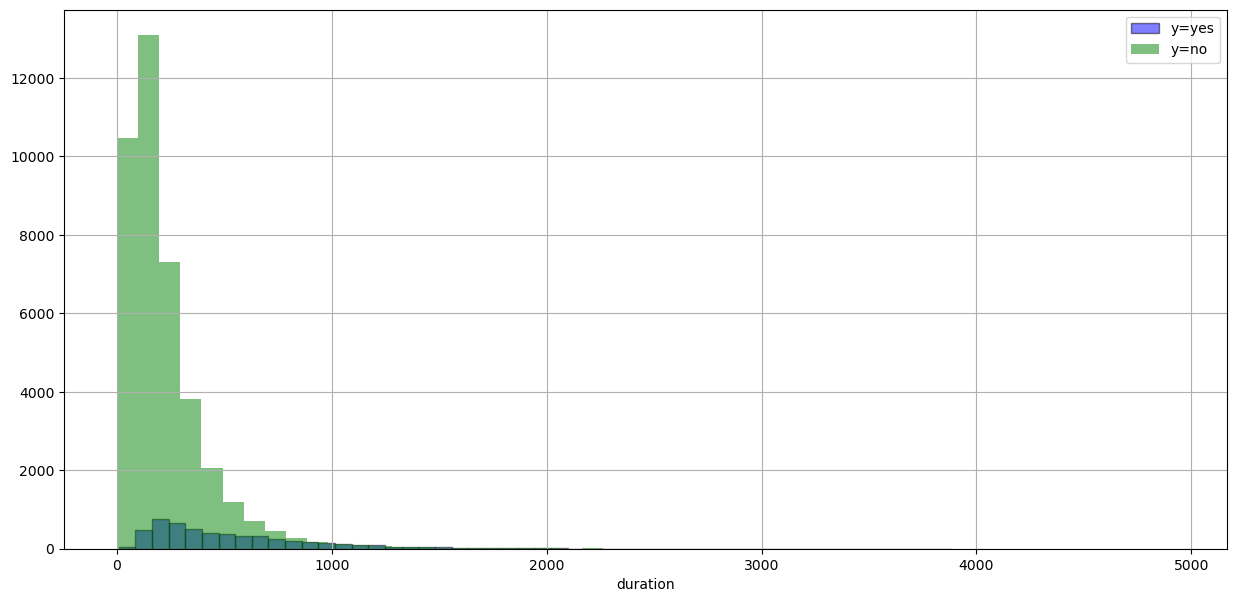

In [31]:
plt.figure(figsize=(15,7))
df1[df1['y']==1]['duration'].hist(alpha = 0.5, color = 'blue', bins= 50, label='y=yes',edgecolor = 'black')
df1[df1['y']==0]['duration'].hist(alpha = 0.5, color = 'green', bins= 50, label='y=no')
plt.legend()
plt.xlabel('duration')
plt.show()

* From this we can see the more duration people talked the more people have been subscribed
* The subscriber count has been increased with the increase in duration
* The highest subscriber count is call between 300-400s

<h3 style="border:2px solid DodgerBlue;">Poutcome w.r.t to Target</h3>

In [32]:
pd.crosstab(df['poutcome'],df['y'],margins=True)  #last year campign outcome

y            no   yes    All
poutcome                    
failure    4283   618   4901
other      1533   307   1840
success     533   978   1511
unknown   33573  3386  36959
All       39922  5289  45211

**pdays=-1  indiactes the customer is not contacted by the campaign**

In [33]:
x = df[df.pdays==-1]
pd.crosstab(x['poutcome'],x['y'])

y            no   yes
poutcome             
unknown   33570  3384

In [34]:
x.poutcome.value_counts()  

unknown    36954
Name: poutcome, dtype: int64

* The account holder is not contacted is matching with the 'unknown' of the poutcome feature
* So we replace everyone with previously not contacted

<h3 style="border:2px solid DodgerBlue;">Contact w.r.t to Target</h3>

In [35]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

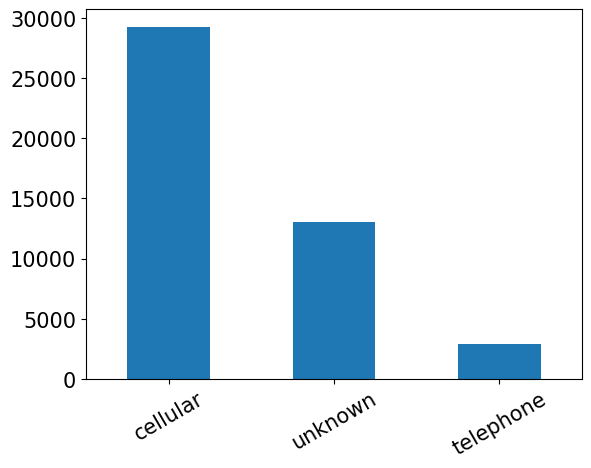

In [170]:
df['contact'].value_counts().plot(kind = 'bar')
plt.xticks(rotation=30)
plt.show()

In [37]:
pd.crosstab(df['contact'],df['y'],margins=True)

y             no   yes    All
contact                      
cellular   24916  4369  29285
telephone   2516   390   2906
unknown    12490   530  13020
All        39922  5289  45211

People who has cellphone has higher number of people subscribed to term deposits

In [38]:
x = df[df.pdays==-1]
pd.crosstab(x['contact'],x['y'],margins=True)

y             no   yes    All
contact                      
cellular   19115  2614  21729
telephone   2023   252   2275
unknown    12432   518  12950
All        33570  3384  36954

In [39]:
x = df[(df.pdays==-1) & (df.campaign==1) & (df['contact']=='unknown') ]
pd.crosstab(x['campaign'],x['y'],margins=True)

y           no  yes   All
campaign                 
1         4926  214  5140
All       4926  214  5140

In [40]:
c = 13020-12950
print(c , ' people whose type of contact is unknown is have contacted previous campaign ' )

70  people whose type of contact is unknown is have contacted previous campaign 


The contact is 'unknown' this column indicates the account holders does not has telecommunication device (or) the device is not 

<h3 style="border:2px solid DodgerBlue;">Marital w.r.t to Target</h3>

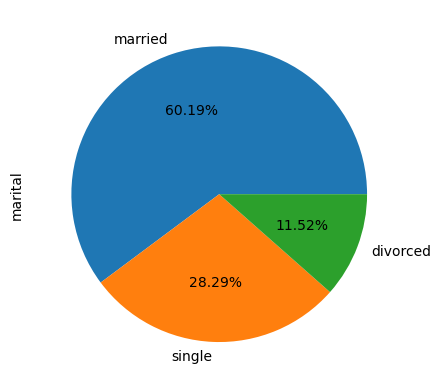

In [149]:
df.marital.value_counts().plot(kind='pie',autopct = '%0.2f%%')
plt.show()

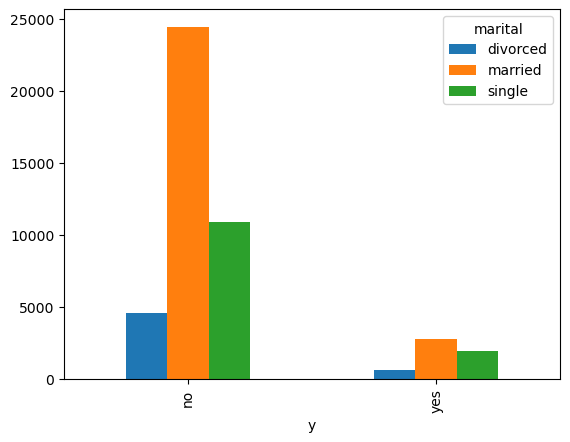

In [150]:
pd.crosstab(df.y,df.marital).plot(kind='bar')
plt.show()

* Most of the account holders are married people
* Married people is subscribing more for term deposits following is single
* We should focus on married and single to increase our subscriber for term deposits

<h3 style="border:3px solid DodgerBlue; color:black ">Job  & Marital</h3>

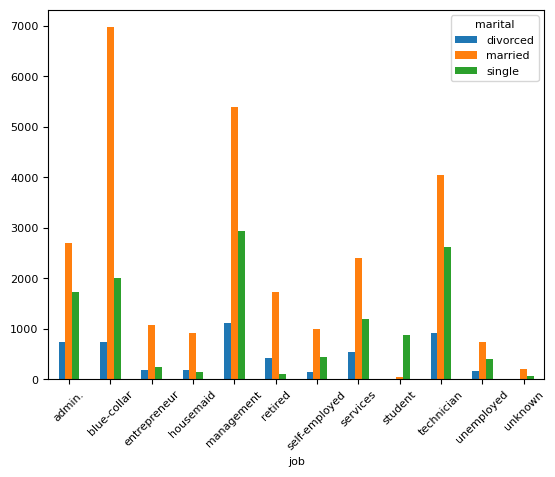

In [183]:
pd.crosstab(df1.job,df1.marital).plot(kind='bar')
plt.rcParams.update({'font.size': 8})
plt.xticks(rotation=45)
plt.show()

* The married and single people are high in number
* They are highly working in the bluecollar, managment, technician, admin jobs
* This answer to the highest bank balance in these kind of jobs
* So if a person is married or single working in bluecollar, managment, technician, admin jobs these 4 jobs they will subscribe
* By targeting these group we can increase our subscribers

<h2><span class="label label-default">Multivariate Analysis</span></h2>

<h3 style="border:2px solid DodgerBlue;">Default, Housing, Loan w.r.t to Target</h3>

In [41]:
df1.groupby(['default','housing','loan'])['y'].sum().to_frame()

y
default housing loan      
no      no      no    3120
                yes    211
        yes     no    1648
                yes    258
yes     no      no      15
                yes      8
        yes     no      22
                yes      7

* The people who dont have any loans are subscribing more
* The people who have only housing loans are also subscribing more
* We should focus on these type of customers to increase the term deposits

<h3 style="border:3px solid DodgerBlue; color:black ">Age and Balance w.r.t to Target</h3>

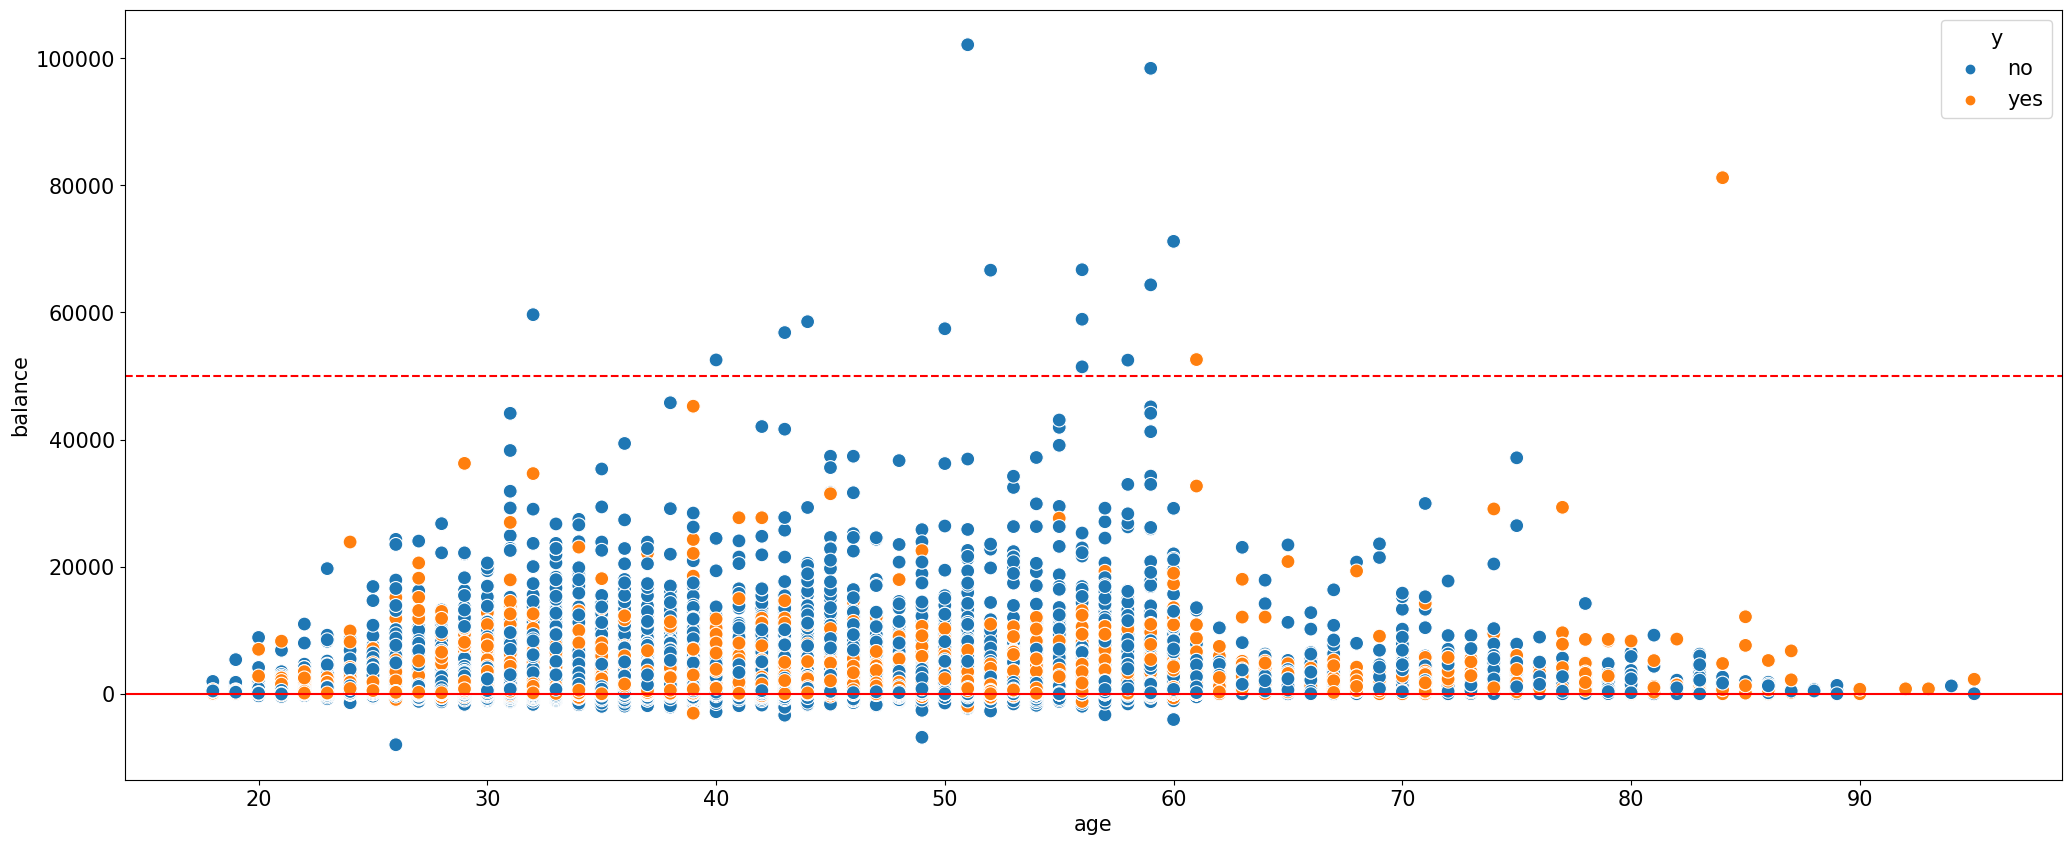

In [42]:
plt.figure(figsize=(25,10))
plt.rcParams.update({'font.size': 15})
sns.scatterplot(df['age'],df['balance'],hue=df['y'],s=100)
plt.axhline(0,color ='r')
plt.axhline(50000,color ='r',linestyle = '--')
plt.show()

In [43]:
len(df['balance'][df['balance']<0])

3766

* most people are having balance less than 3000
* there are a around 3766 people having negative balance (less than 0)
* From the above plot we can say that age with respect to balance has good relation and many people between age 45 and 60 said no for deposits

In [44]:
l=[]
for i in df1['age']:
    if (i>=18) & (i<=39):
        a='young'
        l.append(a)
    elif (i>=40) & (i<=60):
        a='adult'
        l.append(a)
    elif (i>=61) :
        a='old'
        l.append(a)

In [45]:
df1['age_cat'] = l

In [46]:
pd.crosstab(df1['age_cat'],df['y'])

y           no   yes
age_cat             
adult    18715  1946
old        686   502
young    20521  2841

<h3 style="border:3px solid DodgerBlue; color:black ">Pdays and Campaign w.r.t to Target</h3>

In [47]:
x1 = df[df['pdays']==-1]

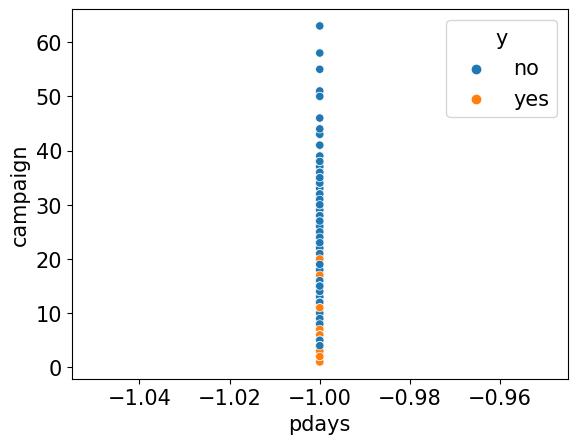

In [48]:
sns.scatterplot(x1['pdays'],x1['campaign'],hue=x1['y'])
plt.show()

* From the graph people who not contacted in the previous campaign, 
* in the  current campiagn with the max of 20 calls they have subscribed 
* more than that is usally not subscribed

In [49]:
x1.groupby('y')['campaign'].count()

y
no     33570
yes     3384
Name: campaign, dtype: int64

* From the 36954 not contatacted during the previows campaign 
* 3384 has said yes during the current campaign and subscribed 

<h3 style="border:3px solid DodgerBlue; color:black ">Job  & Balance w.r.t to Target</h3>

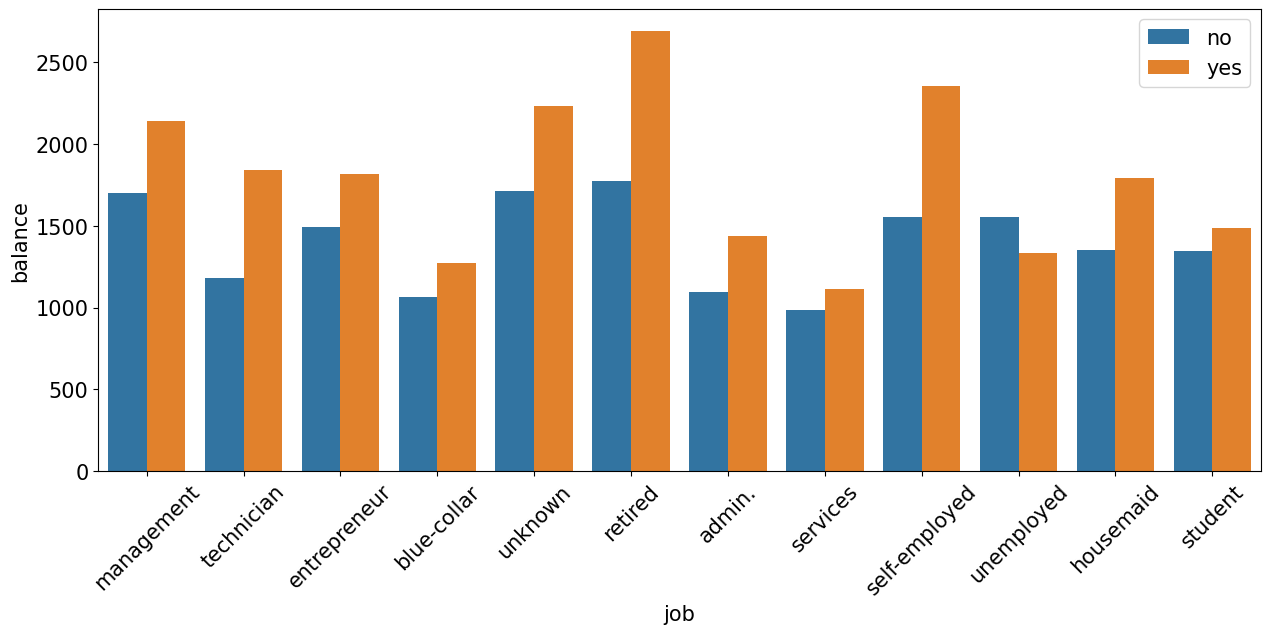

In [172]:
plt.figure(figsize=(15,6))
sns.barplot(df['job'],df['balance'],df['y'],ci = 0)
plt.xticks(rotation= 45)
plt.legend()
plt.show()

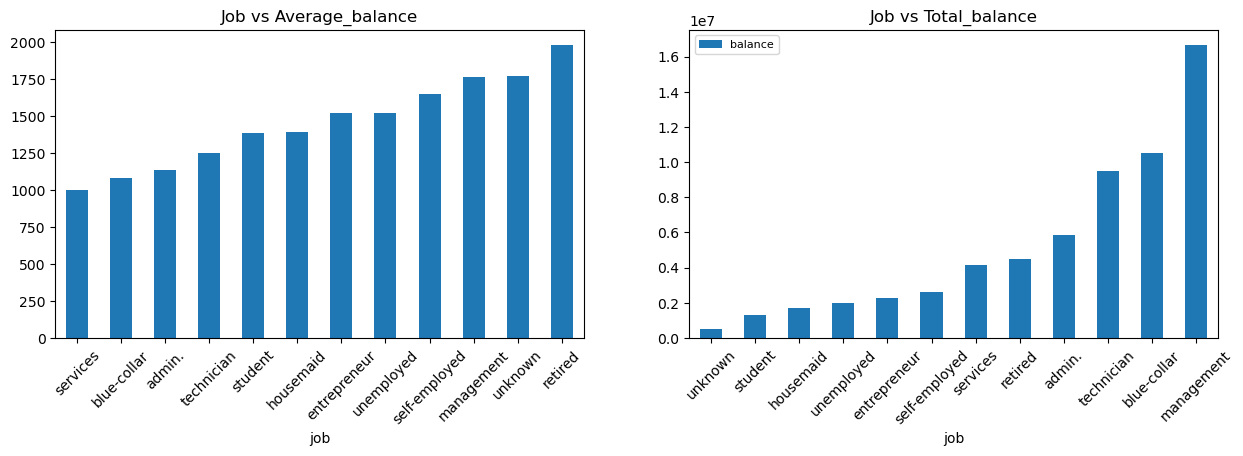

In [174]:
fig,axes = plt.subplots(1,2,figsize=(15,4))
df.groupby(['job'])['balance'].mean().sort_values(ascending = True).plot(kind='bar',ax=axes[0],title='Job vs Average_balance')
df.groupby(['job'])['balance'].sum().sort_values(ascending = True).plot(kind='bar',ax=axes[1],title='Job vs Total_balance')
for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45)
plt.rcParams.update({'font.size':8 })
plt.legend()
plt.show()

* From the above graph we can say that self employeed, retired, management,bluecollar persons has good balance and said yes for term deposits
* We should focus on people working in this job categories for subscription
* People in retired,unknown,managment,selfemployed has high avg balance
* People in managment, blue-collar,technician has high total balance
* We should focus on people working in this job categories for subscription

<h3 style="border:3px solid DodgerBlue; color:black ">Job  & Education w.r.t to Target</h3>

In [60]:
x6= df[df['y']=='yes']

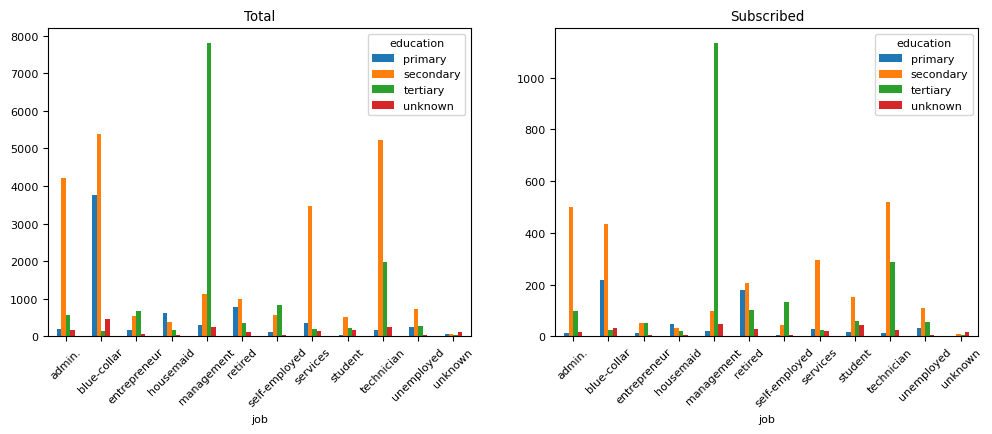

In [184]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
pd.crosstab(df1.job,df1.education).plot(kind='bar',ax=axes[0],title = 'Total')
pd.crosstab(x6.job,x6.education).plot(kind='bar',ax=axes[1],title = 'Subscribed' )
plt.rcParams.update({'font.size': 8})
for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45)
plt.show()

* The people working in the managment,technician,admin, blue-collar have compeleted upto secondary and teritary eduaction

<h3  style="border:2px solid DodgerBlue; color:black ">Balance of <ins>Education & Loan</ins> categories w.r.t not subscribed </h3>

In [63]:
x5= df[df['y']=='no']

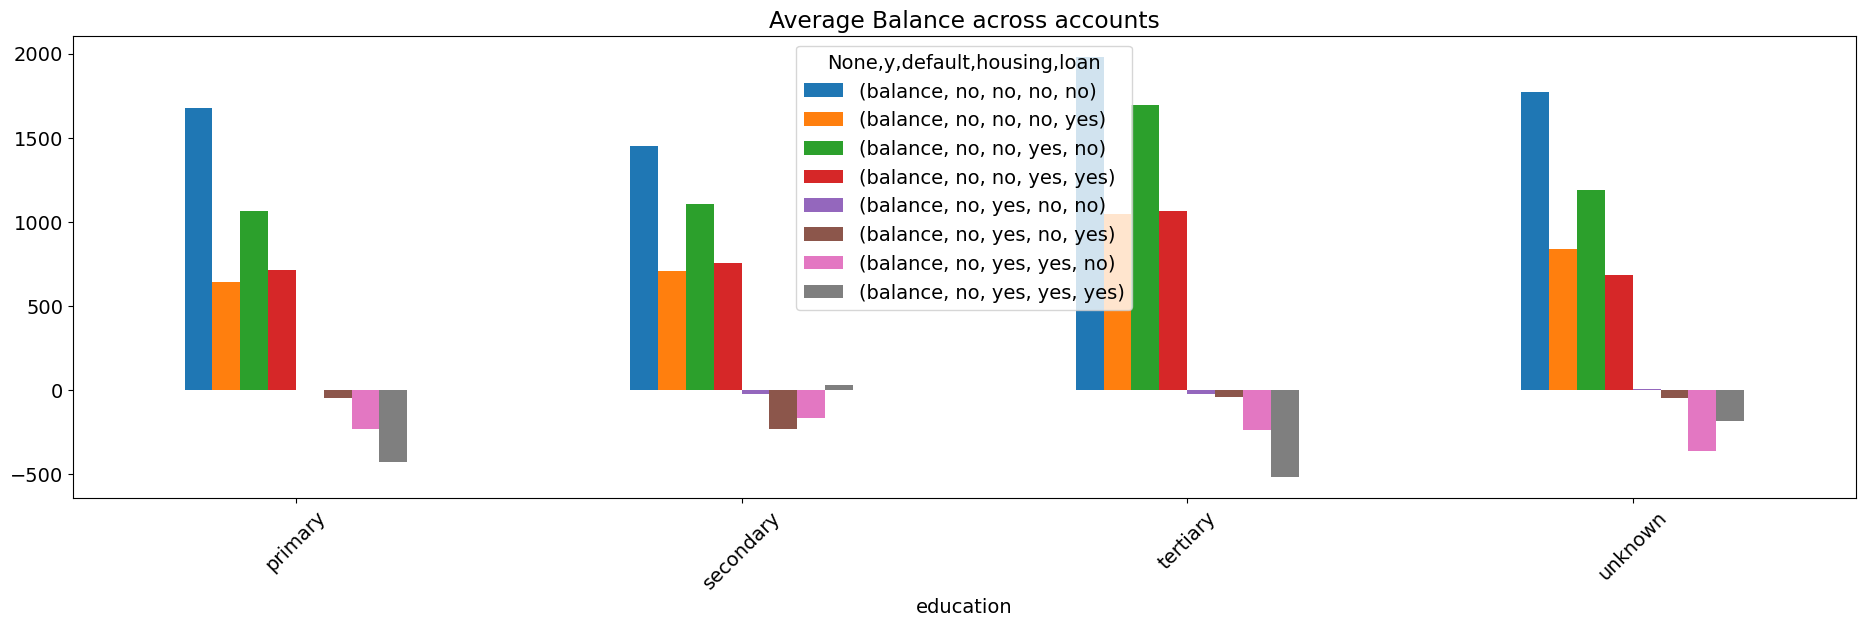

In [190]:
(x5.pivot_table(index = ['education'], columns=['y','default','housing','loan'], values = ['balance'], aggfunc=np.mean)).plot.bar(figsize=(23,6))
plt.title('Average Balance across accounts')
plt.rcParams.update({'font.size': 10})
plt.xticks(rotation=45)
plt.show()

* The customers who don’t have no loan having a good balance.
* The customers having personal, housing and credit having negative balance.
* The people having less no of loans is our target customers for increasing our subscribers.



<h3 style="border:3px solid DodgerBlue; color:black ">Balance of each job and Loan categories w.r.t not subscribed </h3>

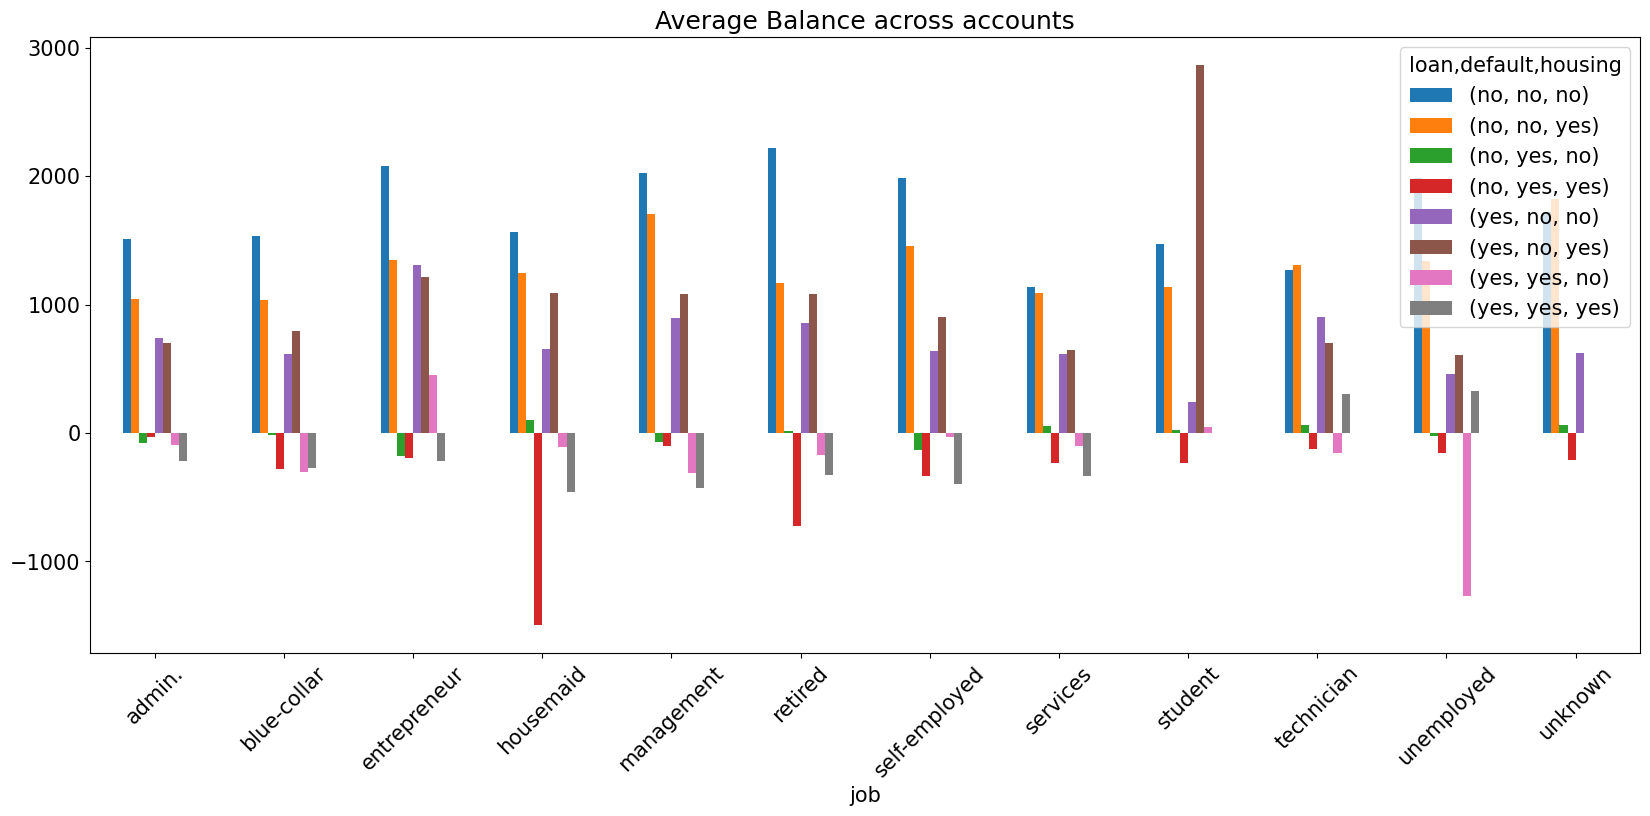

In [65]:
pd.crosstab(index=x5['job'],columns=[x5['loan'],x5['default'],x5['housing']],values=x5['balance'],aggfunc='mean').plot.bar(figsize=(20,8))
plt.title('Average Balance across accounts')
plt.xticks(rotation=45)
#plt.axhline(1500,c='purple',linestyle='--')
plt.show()

* Irresptive of the type of jobs except student
* When they personal,housing and credit, loan their avg balance falls into negative category
* People who only have housing loan thier avg balance is high, does not falls into negative category irrespective of their jobs

<h3 style="border:3px solid DodgerBlue; color:black ">Loans w.r.t to Not subscribed and subscribed </h3>

In [112]:
x5= df[df['y']=='no']
x6= df[df['y']=='yes']

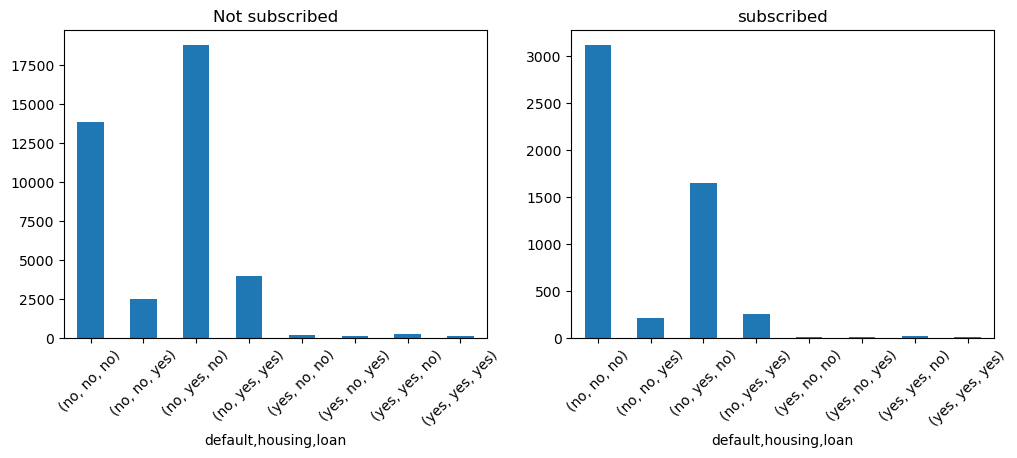

In [191]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
x5.groupby(['default','housing','loan'])['y'].count().plot(kind='bar',ax=axes[0],title='Not subscribed')
x6.groupby(['default','housing','loan'])['y'].count().plot(kind='bar',ax=axes[1],title='subscribed')
for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45)
plt.show()

* who don’t have credit, housing and personal loan are more likely to subscribe to term deposits, 
* who don’t have credit, personal but have housing are also more to subscribe
* If customer who has credit default, they not subscribing to term deposits, even if they don’t have housing or personal loan. 
* We should focus on customers who are not having credit default will subscribe to term to deposits

<h3 style="border:3px solid DodgerBlue; color:black ">Balance of each job and education categories w.r.t not subscribed</h3>

In [109]:
x5= df[df['y']=='no']

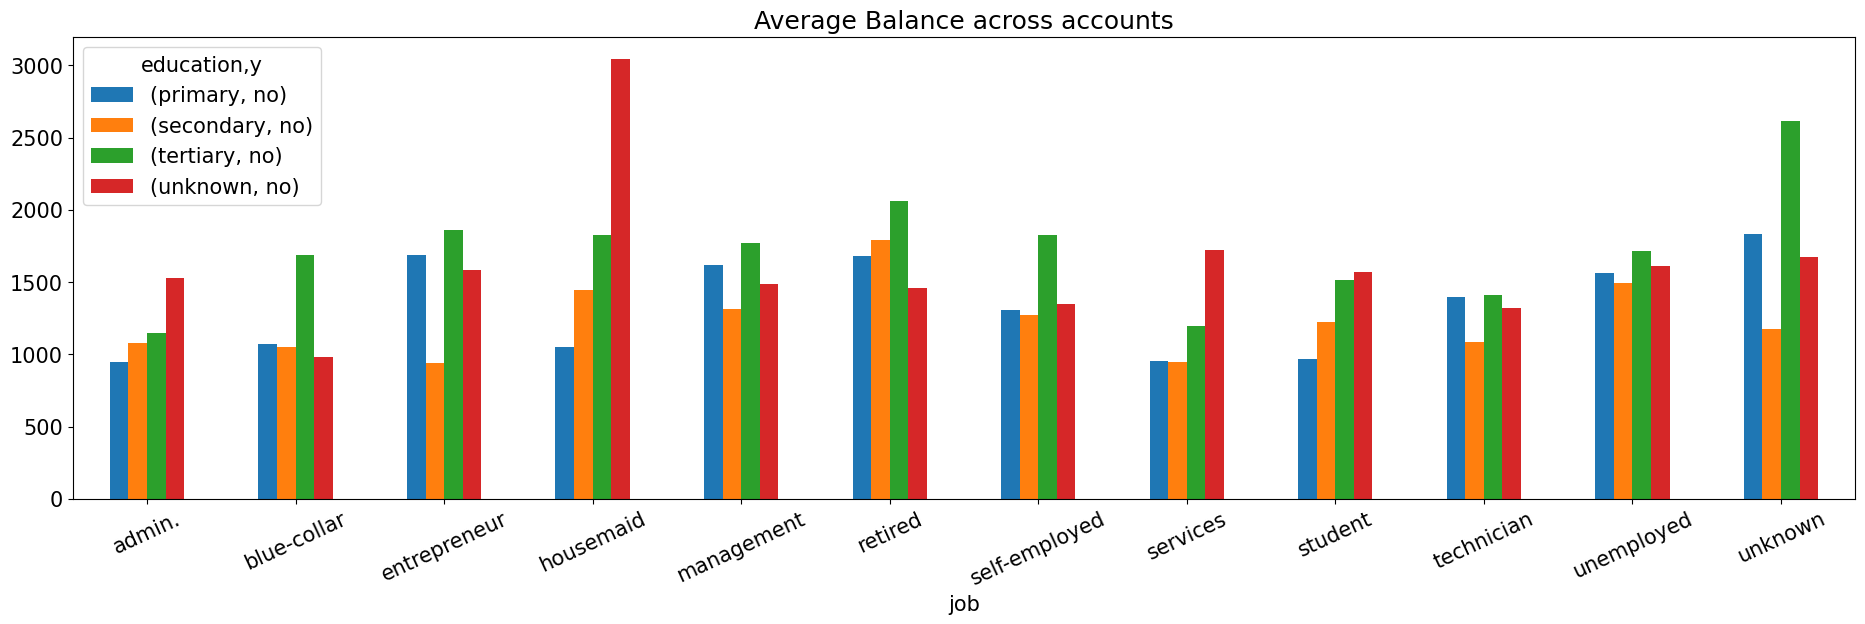

In [194]:
pd.crosstab(index=x5['job'],columns=[x5['education'],x5['y']],values=x5['balance'],aggfunc='mean').plot.bar(figsize=(23,6))
plt.title('Average Balance across accounts')
plt.rcParams.update({'font.size': 15})
plt.xticks(rotation=25)
plt.show()

* The customers who completed secondary and tertiary has a very high bank balance
* They are more customers we should concentrate to improve our term deposits subscriber count


<h3 style="border:2px solid DodgerBlue; color:black ">Month w.r.t to duration & Campaign</h3> 

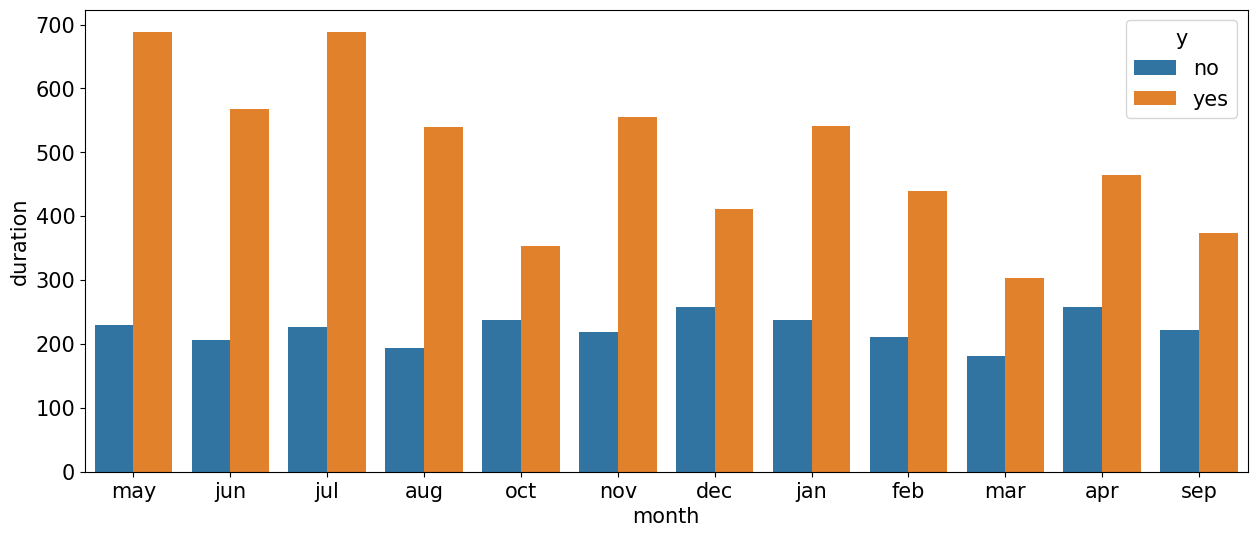

In [195]:
plt.figure(figsize=(15,6))
sns.barplot(df.month,df.duration,hue = df.y,ci=0)
plt.show()

* we infer that increase in number of duration and number of calls have led to more subscriber.
* We can see that people have less call duration and a smaller number of calls have been subscribed less to our term deposits. 

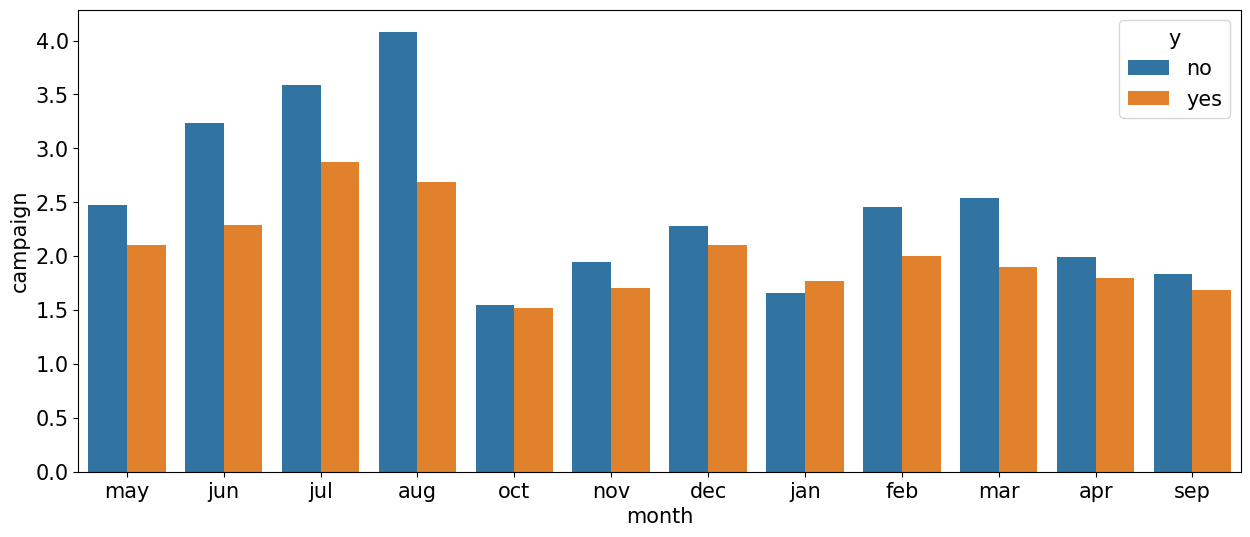

In [196]:
plt.figure(figsize=(15,6))
sns.barplot(df.month,df.campaign,hue = df.y,ci=0)
plt.show()

* We should increase our focus on more calls and the calls must be very effective to increase our subscriber for term deposits.
* Contact people in May, July month has an increased our subscriber counts. So, we should focus on these months for campaign

<h3 style="border:2px solid DodgerBlue; color:black ">Age and balance w.r.t Target</h3> 

<Figure size 2000x1000 with 0 Axes>

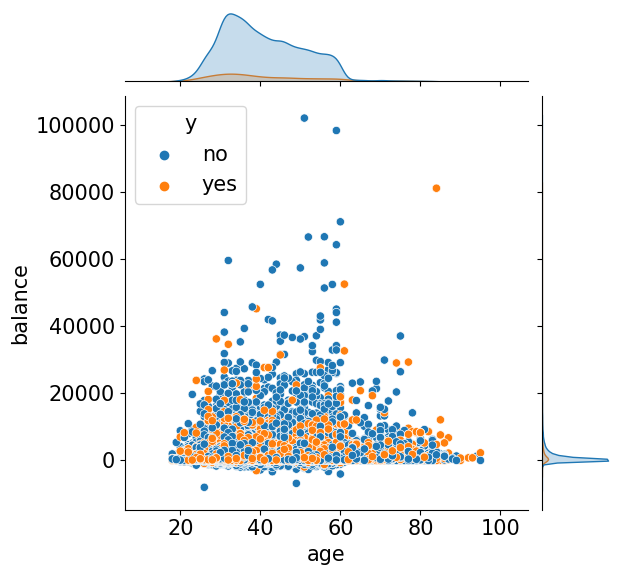

In [117]:
plt.figure(figsize=(20,10))
sns.jointplot(x = 'age', y = 'balance', hue = 'y', data = df)
plt.show()

* we can say that customers with age between 20 to 60 with high balance said no for term deposits and we can target those customers for subscribing term deposits. 
* Their balance is also very high and they have not been subscribed for term deposits.

<h3 style="border:2px solid DodgerBlue; color:black ">Age and Duration w.r.t Target</h3> 

<Figure size 2000x1000 with 0 Axes>

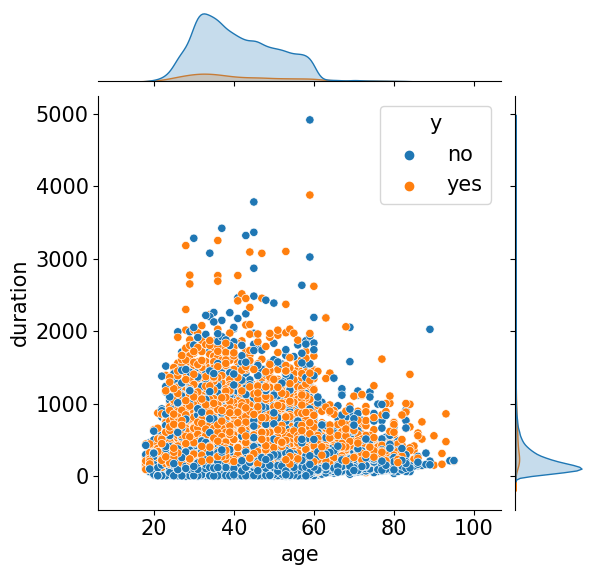

In [120]:
plt.figure(figsize=(20,10))
sns.jointplot(x = 'age', y = 'duration', hue = 'y', data = df)
plt.show()

* that customers between age 20 to 60 have maximum duration on conversation and said yes for the term deposits. 
* Who has less call duration have said no for the term deposits.
* So what ever the age category the calling time must be increased for more subscribers

<h3 style="border:3px solid DodgerBlue; color:black ">Age and Campaign w.r.t Target</h3> 

<Figure size 2000x1000 with 0 Axes>

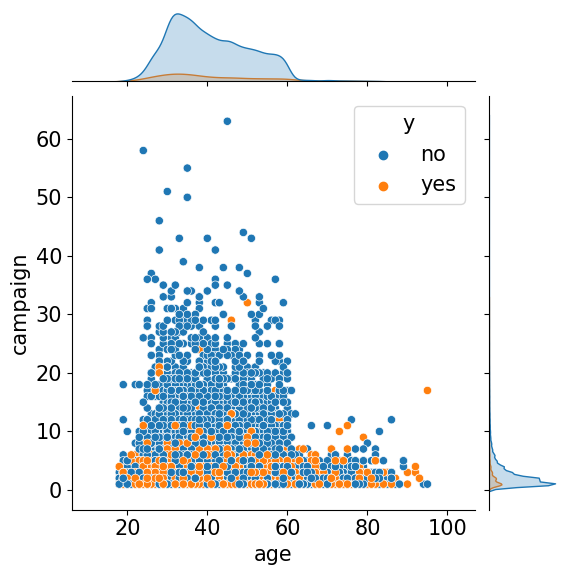

In [121]:
plt.figure(figsize=(20,10))
sns.jointplot(x = 'age', y = 'campaign', hue = 'y', data = df)
plt.show()

<h3 style="border:2px solid DodgerBlue; color:black ">Balance and Campaign w.r.t Target</h3> 

<Figure size 2000x1000 with 0 Axes>

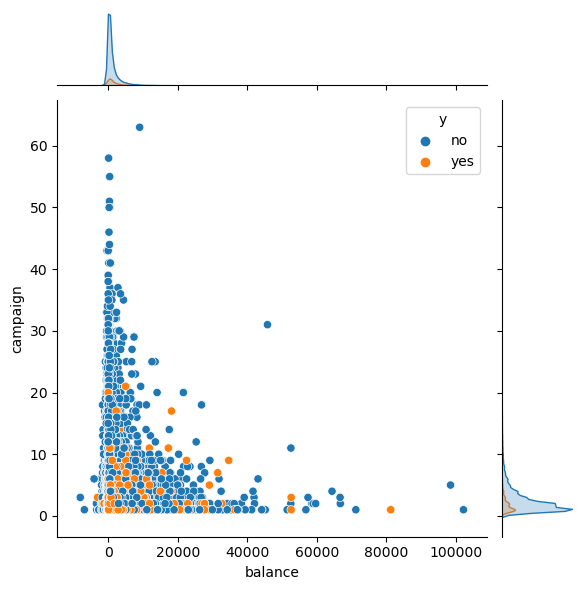

In [154]:
plt.figure(figsize=(20,10))
sns.jointplot(x = 'balance', y = 'campaign', hue = 'y', data = df)
plt.show()

* The high balance customers are contacted less
* If the high balance customers are contacted more there will be more subscribers

<Figure size 2000x1000 with 0 Axes>

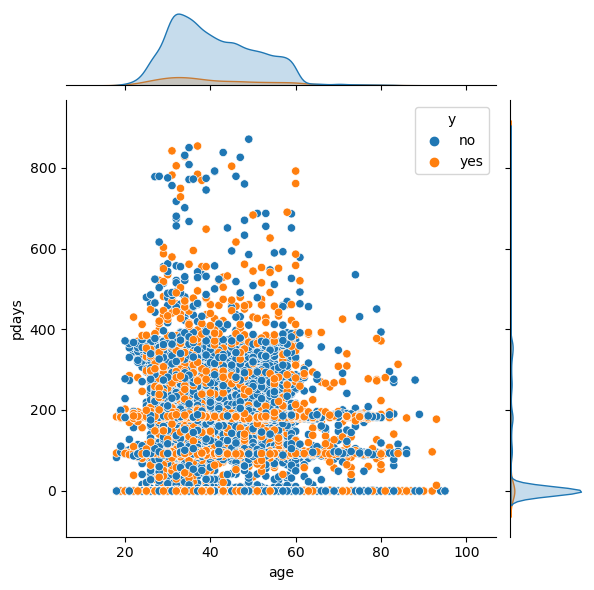

In [155]:
plt.figure(figsize=(20,10))
sns.jointplot(x = 'age', y = 'pdays', hue = 'y', data = df)
plt.show()

<h3 style="border:3px solid DodgerBlue; color:black ">Age and poutcome w.r.t Target</h3> 

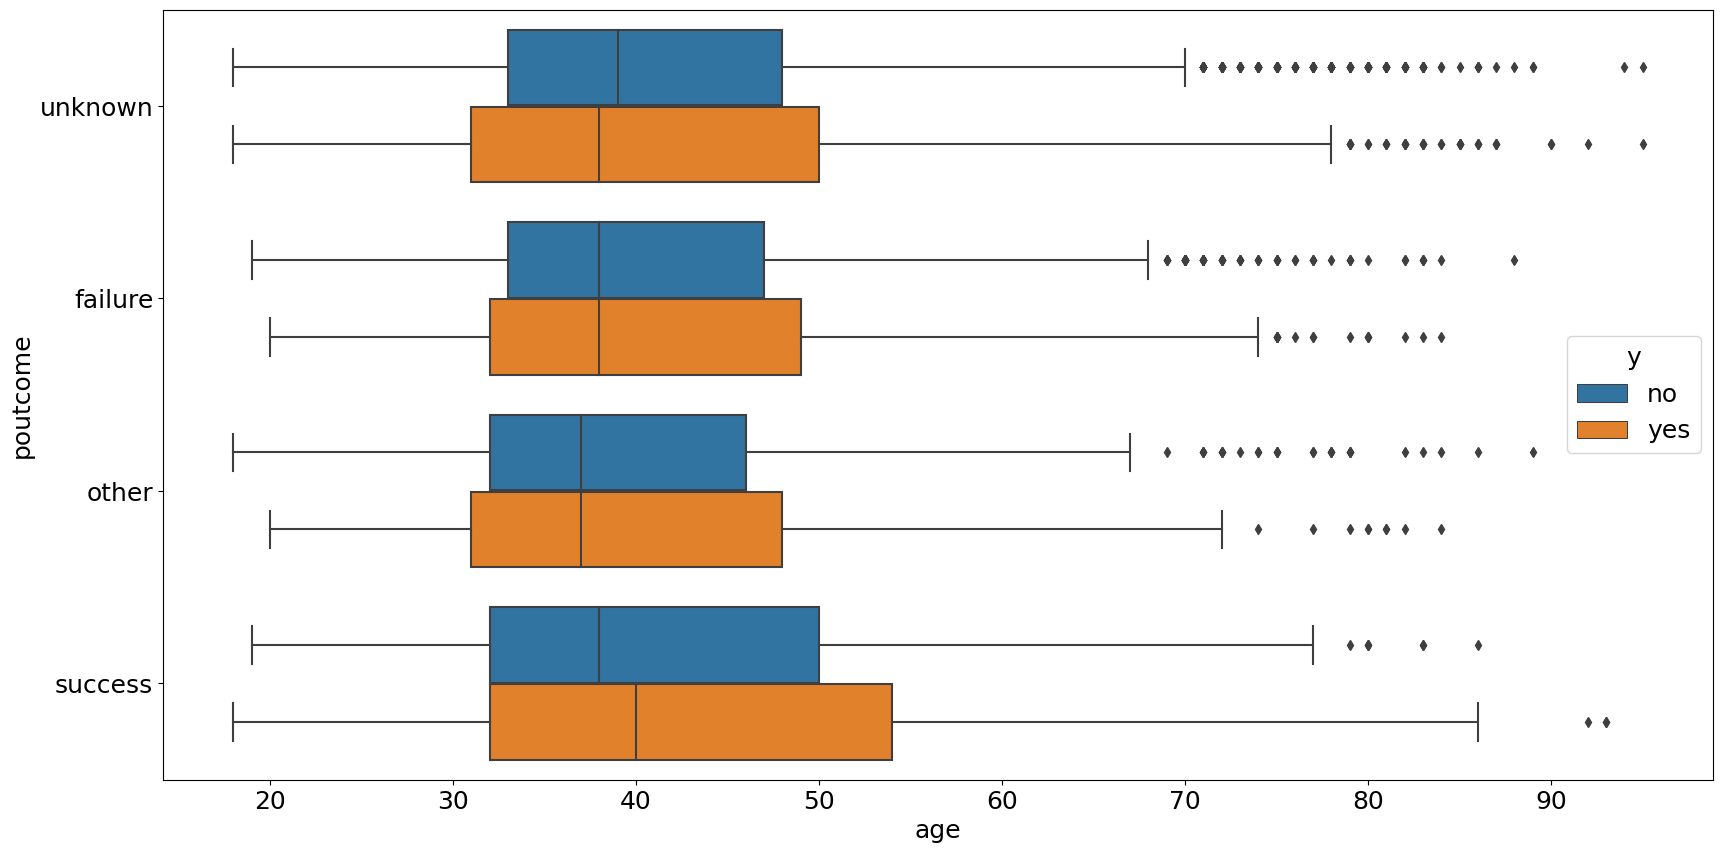

In [128]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18})
sns.boxplot(x = 'age', y = 'poutcome', hue = 'y', data = df)
plt.show()

* From the above plot we can say that success on previous campaign outcome for age between 32 and 54 has good counts for term deposit subscription whereas on failure customers age range between 32 to 49 said no for term deposits subscription.
* Results like unknown and other has the customers age range between 31 to 50. we need to target these customers again to get result on the term deposit subscription



<h3 style="border:3px solid DodgerBlue; color:black ">Age and marital w.r.t Target</h3> 

<AxesSubplot:xlabel='age', ylabel='marital'>

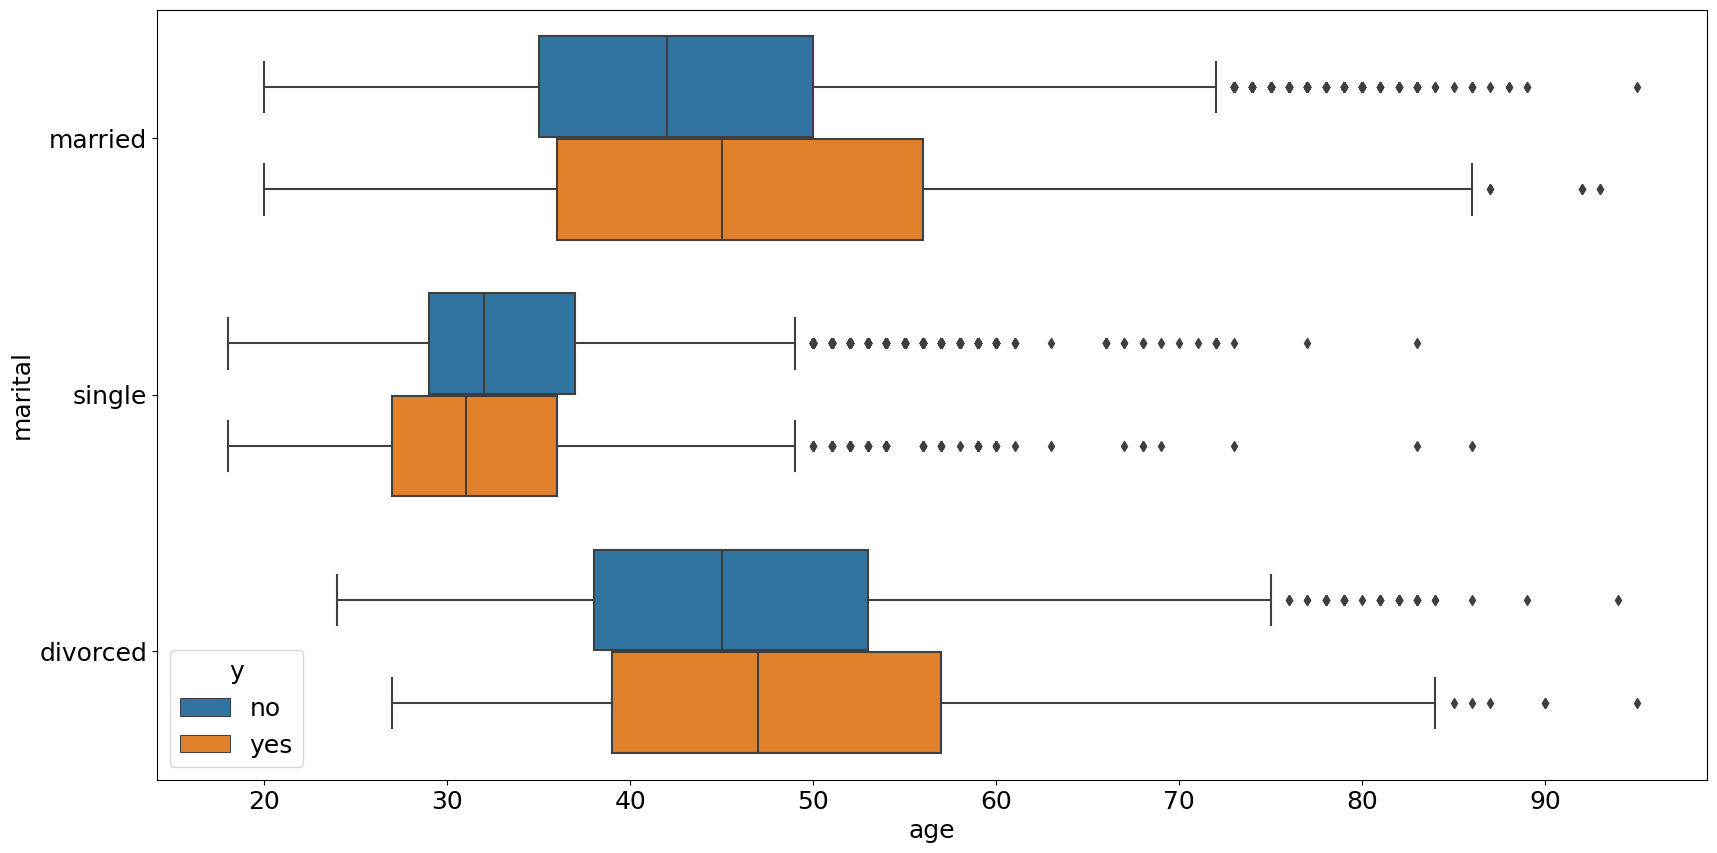

In [129]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'age', y = 'marital', hue = 'y', data = df)
plt.show()

* From the above plot we can say that customers who are married and divorced, age between 37 to 58 have subscribed to term deposits.
* We need to target customers married, divorced and single who were in range 25 to 50 to subscribe term deposits.


<h3 style="border:3px solid DodgerBlue; color:black ">Age and Housing w.r.t Target</h3> 

<AxesSubplot:xlabel='age', ylabel='housing'>

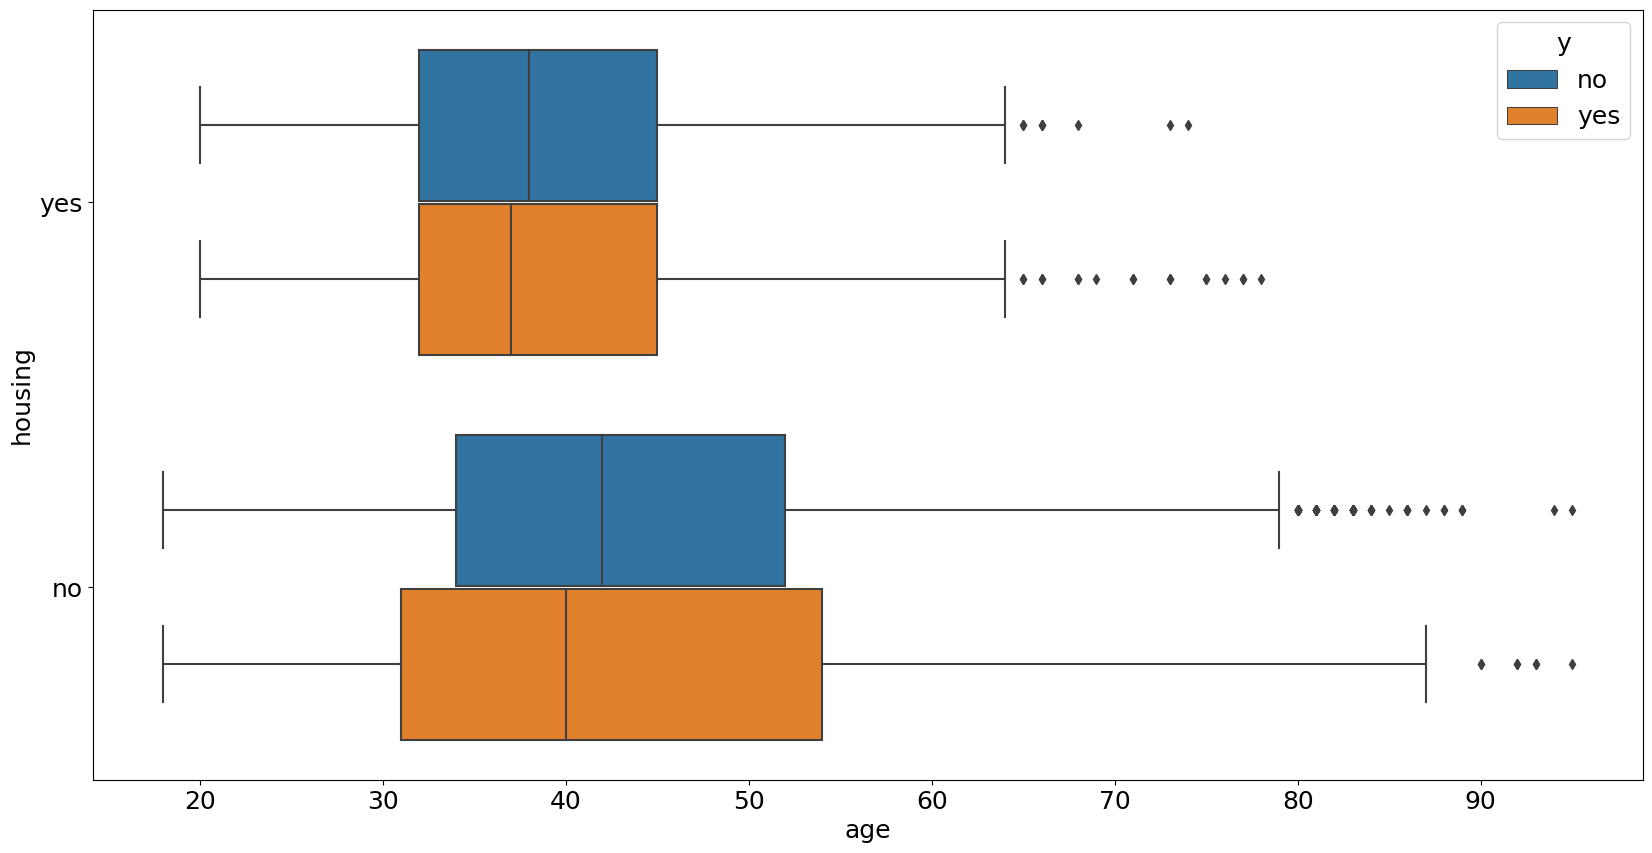

In [130]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'age', y = 'housing', hue = 'y', data = df)
plt.show()

* From this plot we can say that customers with age range 32 to 43 with housing loan said have not subscribed to term deposits and customers without housing loan said yes with age range between 31 to 54

<h3 style="border:3px solid DodgerBlue; color:black ">Age & Loan w.r.t Target</h3> 

<AxesSubplot:xlabel='age', ylabel='loan'>

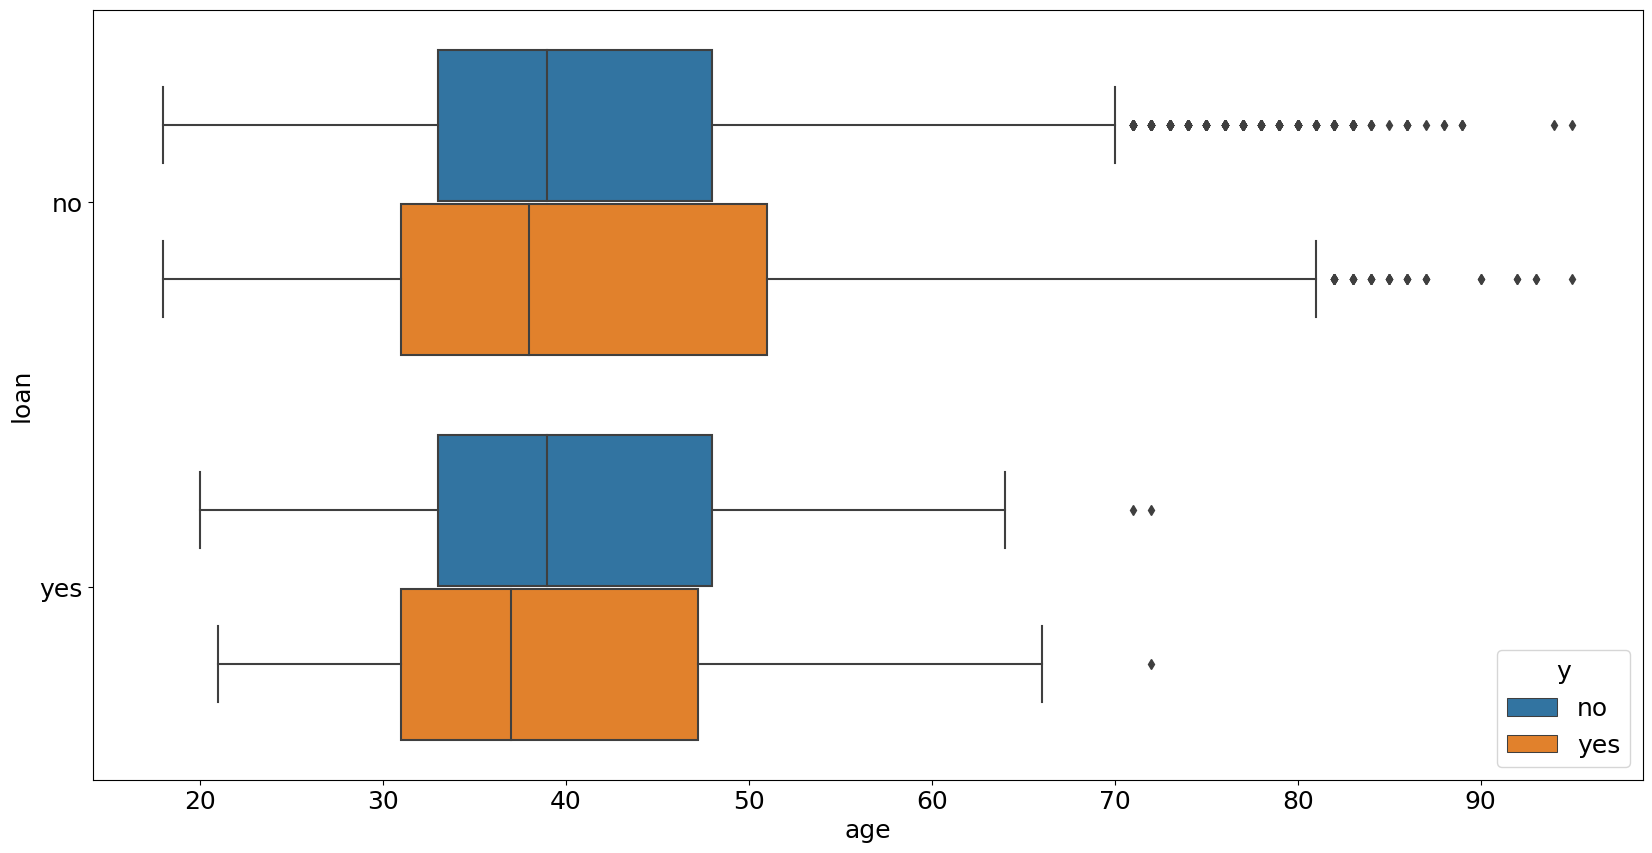

In [131]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'age', y = 'loan', hue = 'y', data = df)
plt.show()

* From this plot we can say that customers with age range 32 to 51 with loan said have not subscribed to term deposits and customers without loan said yes for term deposits with age range between 31 to 47.